# Notebook 1 - Exploratory Data Analysis (EDA)

The following notebook will explore the given data about tennis matches. It will use multiple visualisation tools to understand information in the data. It will also use this information to create a dataset that can used to train a model that can predict the outcome of these these tennis matches.

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as math
from scipy.stats import ttest_ind, levene

In [ ]:
#load files
match_info = pd.read_csv("match_info.csv")
match_outcome = pd.read_csv("match_outcome_stats.csv")
player_info = pd.read_csv("player_info.csv")
player_outcome = pd.read_csv("player_outcome_stats.csv")

In [ ]:
# Putting the information in a dictionary to avoid repetition with basic print statements
data_dict = {}
data_key = ["match_info", "match_outcome", "player_info", "player_outcome"]
data = [match_info, match_outcome, player_info, player_outcome]
for i in range (len(data_key)):
  data_dict[data_key[i]] = (data[i])

In [ ]:
# Observing the columns in the data
for key,value in data_dict.items():
  columns = []
  for col in value.columns:
    columns.append(col)
  print(f"The column names in {key} are: \n {columns}\n")

The column names in match_info are: 
 ['match_id', 'tourney_id', 'tourney_name', 'tourney_date', 'tourney_level', 'surface', 'match_num', 'best_of', 'round']

The column names in match_outcome are: 
 ['match_id', 'score', 'minutes']

The column names in player_info are: 
 ['match_id', 'winner_name', 'loser_name', 'winner_age', 'loser_age', 'winner_rank', 'loser_rank', 'winner_rank_points', 'loser_rank_points', 'winner_seed', 'loser_seed', 'winner_ioc', 'loser_ioc', 'winner_hand', 'loser_hand']

The column names in player_outcome are: 
 ['match_id', 'player_name', 'stat', 'stat_value']



In [ ]:
# Observing the top few rows of all dataframes
for key,value in data_dict.items():
  print(f"The {key} data head: \n {value.head()}\n")

The match_info data head: 
    match_id  tourney_id tourney_name tourney_date tourney_level surface  \
0         0           0      Orlando   2000-05-01             A    Clay   
1         1           0      Orlando   2000-05-01             A    Clay   
2         2           0      Orlando   2000-05-01             A    Clay   
3         3           0      Orlando   2000-05-01             A    Clay   
4         4           0      Orlando   2000-05-01             A    Clay   

   match_num  best_of round  
0          1      3.0   R32  
1          2      3.0   R32  
2          3      3.0   R32  
3          4      3.0   R32  
4          5      3.0   R32  

The match_outcome data head: 
    match_id              score  minutes
0         0  3-6 7-6(6) 7-6(4)    162.0
1         1            6-2 7-5     86.0
2         2            6-1 6-3     64.0
3         3        4-6 6-2 7-5    150.0
4         4            6-1 6-4     60.0

The player_info data head: 
    match_id          winner_name       

## **Cleaning and Preparing the Data**

In [ ]:
# Observing how many NA values exist in each dataframe
for key,value in data_dict.items():
  print (f"Missing values in {key} are:\n {value.isna().sum()}\n")

Missing values in match_info are:
 match_id         0
tourney_id       0
tourney_name     0
tourney_date     0
tourney_level    0
surface          0
match_num        0
best_of          0
round            0
dtype: int64

Missing values in match_outcome are:
 match_id       0
score          0
minutes     1308
dtype: int64

Missing values in player_info are:
 match_id                  0
winner_name               0
loser_name                0
winner_age                6
loser_age                 9
winner_rank             629
loser_rank              745
winner_rank_points      629
loser_rank_points       745
winner_seed           25745
loser_seed            36019
winner_ioc                0
loser_ioc                 0
winner_hand               4
loser_hand               14
dtype: int64

Missing values in player_outcome are:
 match_id       0
player_name    0
stat           0
stat_value     0
dtype: int64



As seen through the above output, the dataframe 'match_info' does not seem to have any NA values. Hence, the code below starts off with formatting the dataframe to suit model(s) needs.

### **Working with match_info**

In [ ]:
# Using groupby() to explore the frequency of each value in the dataset
for col in match_info.columns:
    print(f"{match_info.groupby(col).size()} \n")

match_id
0        1
1        1
2        1
3        1
4        1
        ..
47735    1
47736    1
47737    1
47738    1
47739    1
Length: 47740, dtype: int64 

tourney_id
0        31
1        31
2        31
3       127
4        31
       ... 
2559      4
2560      4
2561      4
2562      2
2563      4
Length: 1243, dtype: int64 

tourney_name
's-Hertogenbosch     244
Acapulco             494
Adelaide             285
Amersfoort           212
Amsterdam             62
                    ... 
Washington           773
Wimbledon           2153
Winston-Salem        280
Zagreb               293
s-Hertogenbosch      265
Length: 220, dtype: int64 

tourney_date
2000-01-03     93
2000-01-10     62
2000-01-17    127
2000-02-07     93
2000-02-14     76
             ... 
2016-11-25      4
2017-01-02     85
2017-01-09     49
2017-01-16    127
2017-02-03    113
Length: 668, dtype: int64 

tourney_level
A    28794
C       30
D      359
F      230
G     8735
M     9592
dtype: int64 

surface
Carpet    

From the output below, everything seems to be in order. However, most of the tourney names are hidden. Hence, the code line below attempts to explore the values in more detail.

In [ ]:
print(f"\n The unique tournament names are: \n\n {match_info['tourney_name'].unique()}") #show unique tournament names


 The unique tournament names are: 

 ['Orlando' 'Atlanta' 'London' 'US Open' 'St. Petersburg' 'Memphis'
 'Indian Wells Masters' 'Rotterdam' 'Hong Kong' 'Casablanca'
 'Australian Open' 'Mexico City' 'Vienna' "'s-Hertogenbosch" 'Adelaide'
 'Scottsdale' 'Moscow' 'Umag' 'Miami Masters' 'Mallorca' 'San Marino'
 'Bucharest' 'Lyon' 'Halle' 'Santiago' 'Tashkent' 'St. Poelten' 'Auckland'
 'Wimbledon' 'Los Angeles' 'Cincinnati Masters' 'Canada Masters'
 'Barcelona' 'San Jose' 'Stockholm' 'Delray Beach' 'Marseille' 'Dubai'
 'Estoril' 'Nottingham' 'Shanghai' 'Chennai' 'Munich' 'Gstaad'
 'Rome Masters' 'Hamburg Masters' 'Monte Carlo Masters' 'Washington'
 'Indianapolis' 'Kitzbuhel' "Queen's Club" 'Newport' 'Amsterdam' 'Bastad'
 'Copenhagen' 'Stuttgart Outdoor' 'Doha' 'Palermo' 'Toulouse' 'Basel'
 'Tokyo' 'Stuttgart Masters' 'Paris Masters' 'Bogota' 'Roland Garros'
 'Brighton' 'Long Island' 'Sydney' 'Dusseldorf' 'Masters Cup' 'Milan'
 'Acapulco' 'Vina del Mar' 'Buenos Aires' 'Sopot - WS' 'Houston'


As seen in the output above, Davis Cup seems to have been segregated by group and round. To make it easier to work with the data, all of these values will be changed to just "Davis Cup".

In [ ]:
for tour in match_info['tourney_name']:
  if tour.count('Davis Cup') > 0: # instances of 'Davis Cup' in tournament
    match_info.loc[match_info['tourney_name'] == tour, 'tourney_name'] = 'Davis Cup' #replace with only 'Davis Cup'

match_info

,match_id,tourney_id,tourney_name,tourney_date,tourney_level,surface,match_num,best_of,round
0,0,0,Orlando,2000-05-01,A,Clay,1,3.0,R32
1,1,0,Orlando,2000-05-01,A,Clay,2,3.0,R32
2,2,0,Orlando,2000-05-01,A,Clay,3,3.0,R32
3,3,0,Orlando,2000-05-01,A,Clay,4,3.0,R32
4,4,0,Orlando,2000-05-01,A,Clay,5,3.0,R32
...,...,...,...,...,...,...,...,...,...
47735,47735,2562,Davis Cup,2017-02-03,D,Hard,2,3.0,RR
47736,47736,2563,Davis Cup,2017-02-03,D,Hard,1,5.0,RR
47737,47737,2563,Davis Cup,2017-02-03,D,Hard,2,5.0,RR
47738,47738,2563,Davis Cup,2017-02-03,D,Hard,4,3.0,RR


We will now begin to drop non-important columns, as well as encode the categorical variables. For our purposes, to save space as well as make the tables more readable, the categorical variables will be label encoded.

In [ ]:
# dropping tourney_date because any time difference affecting outcome should be captured by age
match_info = match_info.drop('tourney_date', axis = 1)


from sklearn.preprocessing import LabelEncoder #import encoder
column_label = ['tourney_name', 'surface', 'round', 'tourney_level'] #columns that need to be label encoded
label_encoder = LabelEncoder() #initialise encoder
match_info[column_label] = match_info[column_label].apply(lambda col: label_encoder.fit_transform(col)) #fit encoder to categorical labels

#print dataframe
match_info


,match_id,tourney_id,tourney_name,tourney_level,surface,match_num,best_of,round
0,0,0,77,0,1,1,3.0,5
1,1,0,77,0,1,2,3.0,5
2,2,0,77,0,1,3,3.0,5
3,3,0,77,0,1,4,3.0,5
4,4,0,77,0,1,5,3.0,5
...,...,...,...,...,...,...,...,...
47735,47735,2562,29,2,3,2,3.0,7
47736,47736,2563,29,2,3,1,5.0,7
47737,47737,2563,29,2,3,2,5.0,7
47738,47738,2563,29,2,3,4,3.0,7


### **Working with match_outcome**

In [ ]:
# fill in missing minutes values
match_outcome = match_outcome.fillna({'minutes': match_outcome['minutes'].mean()}) #fill missing minute values with mean of the column

# re-checking to ensure all NA rows have been filled
match_outcome.isna().sum()

match_id    0
score       0
minutes     0
dtype: int64

In [ ]:
# Using groupby() to explore the kind of values in the dataset
for col in match_outcome.columns:
    print(f"{match_outcome.groupby(col).size()}\n")

match_id
0        1
1        1
2        1
3        1
4        1
        ..
47735    1
47736    1
47737    1
47738    1
47739    1
Length: 47740, dtype: int64

score
 RET                      1
0-1 RET                   4
0-6 1-6 7-6(6) 6-4 8-6    1
0-6 2-6 6-4 6-2 6-2       1
0-6 3-6 6-3 6-4 7-5       1
                         ..
7-6(9) 7-6(3)             2
7-6(9) 7-6(5)             2
7-6(9) 7-6(9) 6-2         1
7-6(9) RET                1
W/O                       5
Length: 8429, dtype: int64

minutes
3.0       2
4.0       2
5.0       3
6.0       4
7.0       2
         ..
344.0     1
353.0     1
393.0     1
665.0     1
1146.0    1
Length: 311, dtype: int64



In [ ]:
#Converting match columns to columns representing how many sets were played and whether the game was retired or not

#arrays to add to dataframe
set_arr = []
ret_arr = []

for sets in match_outcome['score']:
  num_set = sets.count('-') #Number of '-' indicates number of sets
  set_arr.append(num_set) #append to set array
  if sets.count('RET') > 0:  #Is RET mentioned in the data-point?
    ret_arr.append(1) #if yes, append 1 to ret array
  else:
    ret_arr.append(0) #if no, append 0 to ret array

match_outcome['num_sets'] = set_arr
match_outcome['ret'] = ret_arr
match_outcome = match_outcome.drop('score', axis = 1) #drop match outcome array as there is no need for it anymore
match_outcome

,match_id,minutes,num_sets,ret
0,0,162.0,3,0
1,1,86.0,2,0
2,2,64.0,2,0
3,3,150.0,3,0
4,4,60.0,2,0
...,...,...,...,...
47735,47735,136.0,4,1
47736,47736,118.0,3,0
47737,47737,164.0,4,0
47738,47738,73.0,2,0


### **Working with player_info**

In [ ]:
#fill in missing values
player_info = player_info.fillna({'winner_age': player_info['winner_age'].mean(), #fill winner age with mean winner age
                                  'loser_age': player_info['loser_age'].mean(),  #fill loser age with mean loser age
                                  'winner_seed': 0,
                                  'loser_seed': 0
                                  }) #fill missing values with mean

null_data = player_info[player_info.isnull().any(axis=1)] #find rows with missing values
player_info = player_info.drop(null_data.index) #drop rows with missing values

player_info.isna().sum() #checking for any missing values

match_id              0
winner_name           0
loser_name            0
winner_age            0
loser_age             0
winner_rank           0
loser_rank            0
winner_rank_points    0
loser_rank_points     0
winner_seed           0
loser_seed            0
winner_ioc            0
loser_ioc             0
winner_hand           0
loser_hand            0
dtype: int64

In [ ]:
# As many seed values are missing it would make more sense to consider whether or not the player has a seed.
def seed_encode(seed_array, player_info = player_info):
  '''
  The following function binarizes the seed values
  making the seed value 1 if the player has a seed
  and 0 if the player does not have a seed.

  Input:

  seed_array: which seed array needs to be binarized
  player_info: the dataframe; defaults to player_info

  Output:

  player_info: the dataframe with the seed values binarized

  '''
  for seed in player_info[seed_array]:
    if seed > 0:
      player_info.loc[player_info[seed_array] == seed, seed_array] = 1
    else:
      player_info.loc[player_info[seed_array] == seed, seed_array] = 0

seed_encode('winner_seed') #Binarizing winner_seed values
seed_encode('loser_seed') #Binarizing loser_seed values

player_info

,match_id,winner_name,loser_name,winner_age,loser_age,winner_rank,loser_rank,winner_rank_points,loser_rank_points,winner_seed,loser_seed,winner_ioc,loser_ioc,winner_hand,loser_hand
0,0,Antony Dupuis,Andrew Ilie,27.181383,24.035592,113.0,50.0,351.0,762.0,0.0,1.0,FRA,AUS,R,R
1,1,Fernando Gonzalez,Cecil Mamiit,19.756331,23.843943,352.0,139.0,76.0,280.0,0.0,0.0,CHI,PHI,R,R
2,2,Paradorn Srichaphan,Sebastien Lareau,20.881588,27.011636,103.0,133.0,380.0,293.0,0.0,0.0,THA,CAN,R,R
3,3,Jan Siemerink,Justin Gimelstob,30.047912,23.260780,107.0,95.0,371.0,408.0,0.0,1.0,NED,USA,L,R
4,4,Jason Stoltenberg,Alex Lopez Moron,30.075291,29.423682,74.0,111.0,543.0,357.0,1.0,0.0,AUS,ESP,R,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47735,47735,Novak Djokovic,Daniil Medvedev,29.694730,20.969199,2.0,63.0,9825.0,749.0,0.0,0.0,SRB,RUS,R,R
47736,47736,Jack Sock,Marco Chiudinelli,24.350445,35.389459,20.0,146.0,1855.0,414.0,0.0,0.0,USA,SUI,R,R
47737,47737,John Isner,Henri Laaksonen,31.764545,24.835044,23.0,127.0,1715.0,473.0,0.0,0.0,USA,SUI,R,R
47738,47738,Sam Querrey,Adrien Bossel,29.316906,30.091718,27.0,485.0,1435.0,78.0,0.0,0.0,USA,SUI,R,L


As done above, the categorical columns needed to be label encoded. As multiple columns had the same categories, they had to be concatenated first to ensure that the encoding was the same as well. Then they would be split into the original columns.

In [ ]:
# Combine the data from both ioc columns
combined_data_ioc = pd.concat([player_info['winner_ioc'], player_info['loser_ioc']])

# Combine the data from both hand columns
combined_data_hand = pd.concat([player_info['winner_hand'], player_info['loser_hand']])

#fit LabelEncoder on the combined data
label_encoder.fit(combined_data_ioc)

#place encoded data in original columns
player_info['winner_ioc'] = label_encoder.transform(player_info['winner_ioc'])
player_info['loser_ioc'] = label_encoder.transform(player_info['loser_ioc'])

#fit LabelEncoder on the combined data
label_encoder.fit(combined_data_hand)

#place encoded data in original columns
player_info['winner_hand'] = label_encoder.transform(player_info['winner_hand'])
player_info['loser_hand'] = label_encoder.transform(player_info['loser_hand'])


player_info

,match_id,winner_name,loser_name,winner_age,loser_age,winner_rank,loser_rank,winner_rank_points,loser_rank_points,winner_seed,loser_seed,winner_ioc,loser_ioc,winner_hand,loser_hand
0,0,Antony Dupuis,Andrew Ilie,27.181383,24.035592,113.0,50.0,351.0,762.0,0.0,1.0,30,3,1,1
1,1,Fernando Gonzalez,Cecil Mamiit,19.756331,23.843943,352.0,139.0,76.0,280.0,0.0,0.0,15,62,1,1
2,2,Paradorn Srichaphan,Sebastien Lareau,20.881588,27.011636,103.0,133.0,380.0,293.0,0.0,0.0,75,14,1,1
3,3,Jan Siemerink,Justin Gimelstob,30.047912,23.260780,107.0,95.0,371.0,408.0,0.0,1.0,56,83,0,1
4,4,Jason Stoltenberg,Alex Lopez Moron,30.075291,29.423682,74.0,111.0,543.0,357.0,1.0,0.0,3,27,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47735,47735,Novak Djokovic,Daniil Medvedev,29.694730,20.969199,2.0,63.0,9825.0,749.0,0.0,0.0,70,68,1,1
47736,47736,Jack Sock,Marco Chiudinelli,24.350445,35.389459,20.0,146.0,1855.0,414.0,0.0,0.0,83,72,1,1
47737,47737,John Isner,Henri Laaksonen,31.764545,24.835044,23.0,127.0,1715.0,473.0,0.0,0.0,83,72,1,1
47738,47738,Sam Querrey,Adrien Bossel,29.316906,30.091718,27.0,485.0,1435.0,78.0,0.0,0.0,83,72,1,0


### **Working with player_outcome**

In [ ]:
player_outcome.isna().sum() # 1 missing observation in 3 columns

match_id       0
player_name    0
stat           0
stat_value     0
dtype: int64

In [ ]:
player_outcome = player_outcome.dropna()
player_outcome.isna().sum() # 0 missing observations

match_id       0
player_name    0
stat           0
stat_value     0
dtype: int64

In [ ]:
# Observing values in every column to look for anomalies at first glance
for col in player_outcome.columns:
    print(f"{player_outcome.groupby(col).size()}\n")

# Nothing unusal observed

match_id
0        18
1        18
2        18
3        18
4        18
         ..
47735    18
47736    18
47737    18
47738    18
47739    18
Length: 47740, dtype: int64

player_name
Abdulhamid Mubarak        9
Abdulla Hajji            27
Abdullah Maqdas          18
Abdulrahman Alawadhi      9
Adam Chadaj              18
                       ... 
Zbynek Mlynarik           9
Ze Zhang                234
Zeljko Krajan           288
Zhe Li                   45
Zhizhen Zhang            18
Length: 1389, dtype: int64

stat
ace          95480
bpfaced      95480
bpsaved      95480
df           95480
firstin      95480
firstwon     95480
secondwon    95480
svgms        95480
svpt         95480
dtype: int64

stat_value
0      32343
1      44371
2      49408
3      47541
4      41624
       ...  
292        1
328        1
361        1
489        1
491        1
Length: 245, dtype: int64



In [ ]:
# Creating new columns for players in a game (by match_id) with the end goal of segregating stats for each player
players = player_outcome[['match_id', 'player_name']].drop_duplicates().groupby('match_id')['player_name'].apply(list).reset_index()
players

,match_id,player_name
0,0,"[Andrew Ilie, Antony Dupuis]"
1,1,"[Cecil Mamiit, Fernando Gonzalez]"
2,2,"[Paradorn Srichaphan, Sebastien Lareau]"
3,3,"[Jan Siemerink, Justin Gimelstob]"
4,4,"[Alex Lopez Moron, Jason Stoltenberg]"
...,...,...
47735,47735,"[Daniil Medvedev, Novak Djokovic]"
47736,47736,"[Jack Sock, Marco Chiudinelli]"
47737,47737,"[Henri Laaksonen, John Isner]"
47738,47738,"[Adrien Bossel, Sam Querrey]"


In [ ]:
# Creating new columns for player 1 and player 2 in each game
players['player1'] = players['player_name'].apply(lambda x: x[0] if len(x) > 0 else None)
players['player2'] = players['player_name'].apply(lambda x: x[1] if len(x) > 1 else None)
# Merge back to the original dataframe
player_outcome = pd.merge(player_outcome, players[['match_id', 'player1', 'player2']], on='match_id')
player_outcome

,match_id,player_name,stat,stat_value,player1,player2
0,0,Andrew Ilie,ace,13,Andrew Ilie,Antony Dupuis
1,0,Andrew Ilie,df,4,Andrew Ilie,Antony Dupuis
2,0,Andrew Ilie,svpt,110,Andrew Ilie,Antony Dupuis
3,0,Andrew Ilie,firstin,59,Andrew Ilie,Antony Dupuis
4,0,Andrew Ilie,firstwon,49,Andrew Ilie,Antony Dupuis
...,...,...,...,...,...,...
859315,47739,Steve Johnson,firstwon,26,Antoine Bellier,Steve Johnson
859316,47739,Steve Johnson,secondwon,9,Antoine Bellier,Steve Johnson
859317,47739,Steve Johnson,svgms,10,Antoine Bellier,Steve Johnson
859318,47739,Steve Johnson,bpsaved,3,Antoine Bellier,Steve Johnson


In [ ]:
# Formatting the dataframe to gain a better visual on segregated stats for each player in a match
player_outcome = player_outcome.groupby(['match_id', 'player1', 'player2', 'stat'])['stat_value'].apply(list).unstack()
player_outcome

,,stat,ace,bpfaced,bpsaved,df,firstin,firstwon,secondwon,svgms,svpt
match_id,player1,player2,,,,,,,,,
0,Andrew Ilie,Antony Dupuis,"[13, 8]","[4, 15]","[4, 14]","[4, 1]","[59, 76]","[49, 56]","[31, 29]","[17, 16]","[110, 126]"
1,Cecil Mamiit,Fernando Gonzalez,"[0, 4]","[9, 6]","[4, 4]","[0, 2]","[24, 35]","[13, 25]","[17, 16]","[10, 10]","[57, 67]"
2,Paradorn Srichaphan,Sebastien Lareau,"[4, 2]","[0, 10]","[0, 6]","[1, 2]","[29, 39]","[23, 22]","[11, 10]","[8, 8]","[46, 65]"
3,Jan Siemerink,Justin Gimelstob,"[8, 4]","[12, 11]","[9, 6]","[6, 6]","[56, 57]","[43, 35]","[21, 24]","[15, 15]","[109, 104]"
4,Alex Lopez Moron,Jason Stoltenberg,"[0, 3]","[6, 1]","[3, 1]","[3, 0]","[28, 27]","[17, 22]","[10, 16]","[8, 9]","[47, 50]"
...,...,...,...,...,...,...,...,...,...,...,...
47735,Daniil Medvedev,Novak Djokovic,"[7, 4]","[13, 14]","[6, 9]","[2, 3]","[51, 70]","[29, 42]","[20, 16]","[13, 14]","[96, 104]"
47736,Jack Sock,Marco Chiudinelli,"[12, 4]","[4, 12]","[4, 7]","[1, 5]","[50, 52]","[37, 38]","[22, 9]","[13, 13]","[83, 82]"
47737,Henri Laaksonen,John Isner,"[7, 28]","[11, 9]","[7, 8]","[9, 0]","[76, 90]","[53, 68]","[17, 25]","[19, 19]","[113, 139]"


In [ ]:
# Splitting the values in each list with respect to player1 and player2
columns_to_split = ['ace', 'bpfaced','bpsaved','df','firstin','firstwon','secondwon','svgms','svpt']
for col in columns_to_split:
    player_outcome[f'player1_{col}'] = player_outcome[col].apply(lambda x: x[0] if len(x) > 0 else None)
    player_outcome[f'player2_{col}'] = player_outcome[col].apply(lambda x: x[1] if len(x) > 1 else None)
    #player_outcome[f'player1_{col}'] = player_outcome[col].apply(lambda x: x[0])
    #player_outcome[f'player2_{col}'] = player_outcome[col].apply(lambda x: x[1])
#player_outcome

# Dropping the original columns with list representations of stat values
player_outcome = player_outcome.drop(columns = columns_to_split)
player_outcome

,,stat,player1_ace,player2_ace,player1_bpfaced,player2_bpfaced,player1_bpsaved,player2_bpsaved,player1_df,player2_df,player1_firstin,player2_firstin,player1_firstwon,player2_firstwon,player1_secondwon,player2_secondwon,player1_svgms,player2_svgms,player1_svpt,player2_svpt
match_id,player1,player2,,,,,,,,,,,,,,,,,,
0,Andrew Ilie,Antony Dupuis,13,8,4,15,4,14,4,1,59,76,49,56,31,29,17,16,110,126
1,Cecil Mamiit,Fernando Gonzalez,0,4,9,6,4,4,0,2,24,35,13,25,17,16,10,10,57,67
2,Paradorn Srichaphan,Sebastien Lareau,4,2,0,10,0,6,1,2,29,39,23,22,11,10,8,8,46,65
3,Jan Siemerink,Justin Gimelstob,8,4,12,11,9,6,6,6,56,57,43,35,21,24,15,15,109,104
4,Alex Lopez Moron,Jason Stoltenberg,0,3,6,1,3,1,3,0,28,27,17,22,10,16,8,9,47,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47735,Daniil Medvedev,Novak Djokovic,7,4,13,14,6,9,2,3,51,70,29,42,20,16,13,14,96,104
47736,Jack Sock,Marco Chiudinelli,12,4,4,12,4,7,1,5,50,52,37,38,22,9,13,13,83,82
47737,Henri Laaksonen,John Isner,7,28,11,9,7,8,9,0,76,90,53,68,17,25,19,19,113,139


In [ ]:
'''
  Creating a new dataframe with sorted player names with then end goal
  of assigning each player a player_id alphabetically (aids in
  interpreting model)

  Generating a player_id according to ascending order of players will help
  interpret the model. This is further explained during modeling.
'''
df_player_id = pd.read_csv("player_outcome_stats.csv")

player_name_unique_array = df_player_id['player_name'].unique() # Obtaining names of the players
df_player_name_unique = pd.DataFrame(player_name_unique_array, columns=['player_name_unique']) # Converting array to dataframe for better visualization

# Sorting player names in ascending order and generating player_id accordingly
df_player_name_unique = df_player_name_unique.sort_values(by='player_name_unique').reset_index(drop=True)
player_id_map = {}
for i in range(len(player_name_unique_array)):
    player_id_map[player_name_unique_array[i]] = i+1

df_player_name_unique['player_id'] = player_id_map.values()
df_player_name_unique

,player_name_unique,player_id
0,Abdulhamid Mubarak,1
1,Abdulla Hajji,2
2,Abdullah Maqdas,3
3,Abdulrahman Alawadhi,4
4,Adam Chadaj,5
...,...,...
1384,Zbynek Mlynarik,1385
1385,Ze Zhang,1386
1386,Zeljko Krajan,1387
1387,Zhe Li,1388


### **Creating the Dataset for Model Building**

Now that all the datasets have been cleaned and modified, all four datasets will be merged on the common column 'match_id' to create the dataset that will be used to train and test the model(s).

In [ ]:
# The four main datasets used for model building
print(match_info.shape)
print(match_outcome.shape)
print(player_info.shape)
print(player_outcome.shape)

(47740, 8)
(47740, 4)
(46949, 15)
(47740, 18)


In [ ]:
# Merging the datasets to create the dataset that is going to be used for model building
df_final = pd.merge(match_info, match_outcome, on='match_id', how='inner') #merging on match_id as it exists in all four datasets
df_final = pd.merge(df_final, player_info, on='match_id', how='inner')
df_final = pd.merge(df_final, player_outcome, on='match_id', how='inner')
df_final.columns

Index(['match_id', 'tourney_id', 'tourney_name', 'tourney_level', 'surface',
       'match_num', 'best_of', 'round', 'minutes', 'num_sets', 'ret',
       'winner_name', 'loser_name', 'winner_age', 'loser_age', 'winner_rank',
       'loser_rank', 'winner_rank_points', 'loser_rank_points', 'winner_seed',
       'loser_seed', 'winner_ioc', 'loser_ioc', 'winner_hand', 'loser_hand',
       'player1_ace', 'player2_ace', 'player1_bpfaced', 'player2_bpfaced',
       'player1_bpsaved', 'player2_bpsaved', 'player1_df', 'player2_df',
       'player1_firstin', 'player2_firstin', 'player1_firstwon',
       'player2_firstwon', 'player1_secondwon', 'player2_secondwon',
       'player1_svgms', 'player2_svgms', 'player1_svpt', 'player2_svpt'],
      dtype='object')

In [ ]:
'''Creating a dictionary from the df_player_name_unique dataframe created earlier. The dictionary uses player names as keys and player_id has values.
This was done to create winner_id and loser_id columns in the final dataset as these all models take in only numerical data.'''

player_id_map_two = dict(zip(df_player_name_unique['player_name_unique'], df_player_name_unique['player_id']))

# Creating winner_player_id and loser_player_id columns
df_final['winner_player_id'] = df_final['winner_name'].map(player_id_map_two)
df_final['loser_player_id'] = df_final['loser_name'].map(player_id_map_two)

# cross checking player_id values with df_player_name_unique dataframe
df_player_name_unique[df_player_name_unique['player_name_unique'] == 'Antony Dupuis'] # the values match

,player_name_unique,player_id
123,Antony Dupuis,124


In [ ]:
df_final

,match_id,tourney_id,tourney_name,tourney_level,surface,match_num,best_of,round,minutes,num_sets,...,player1_firstwon,player2_firstwon,player1_secondwon,player2_secondwon,player1_svgms,player2_svgms,player1_svpt,player2_svpt,winner_player_id,loser_player_id
0,0,0,77,0,1,1,3.0,5,162.0,3,...,49,56,31,29,17,16,110,126,124,106
1,1,0,77,0,1,2,3.0,5,86.0,2,...,13,25,17,16,10,10,57,67,378,202
2,2,0,77,0,1,3,3.0,5,64.0,2,...,23,22,11,10,8,8,46,65,1030,1193
3,3,0,77,0,1,4,3.0,5,150.0,3,...,43,35,21,24,15,15,109,104,574,689
4,4,0,77,0,1,5,3.0,5,60.0,2,...,17,22,10,16,8,9,47,50,585,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46944,47735,2562,29,2,3,2,3.0,7,136.0,4,...,29,42,20,16,13,14,96,104,1004,265
46945,47736,2563,29,2,3,1,5.0,7,118.0,3,...,37,38,22,9,13,13,83,82,548,814
46946,47737,2563,29,2,3,2,5.0,7,164.0,4,...,53,68,17,25,19,19,113,139,629,491
46947,47738,2563,29,2,3,4,3.0,7,73.0,2,...,30,31,14,14,10,11,76,58,1166,17


In [ ]:
'''The way I write results is depending on who had the greater player_id. Because the player id was made alphabetically,
the player with the higher player id automatically is further down alphabetically. If the winner has a higher player id
than the loser, the result is a 1. Otherwise, it is a 0. This is quite roundabout and upon revision I realised I could
used the player_1 and player_2 names that I created to come up with an easier way to parse results. However, the models
still work perfectly with this result structure.'''
df_final['result'] = df_final.apply(lambda row: 1 if row['winner_player_id'] > row['loser_player_id'] else 0, axis=1)
df_final = df_final.drop(['winner_name', 'loser_name'], axis = 1)
df_final

,match_id,tourney_id,tourney_name,tourney_level,surface,match_num,best_of,round,minutes,num_sets,...,player2_firstwon,player1_secondwon,player2_secondwon,player1_svgms,player2_svgms,player1_svpt,player2_svpt,winner_player_id,loser_player_id,result
0,0,0,77,0,1,1,3.0,5,162.0,3,...,56,31,29,17,16,110,126,124,106,1
1,1,0,77,0,1,2,3.0,5,86.0,2,...,25,17,16,10,10,57,67,378,202,1
2,2,0,77,0,1,3,3.0,5,64.0,2,...,22,11,10,8,8,46,65,1030,1193,0
3,3,0,77,0,1,4,3.0,5,150.0,3,...,35,21,24,15,15,109,104,574,689,0
4,4,0,77,0,1,5,3.0,5,60.0,2,...,22,10,16,8,9,47,50,585,53,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46944,47735,2562,29,2,3,2,3.0,7,136.0,4,...,42,20,16,13,14,96,104,1004,265,1
46945,47736,2563,29,2,3,1,5.0,7,118.0,3,...,38,22,9,13,13,83,82,548,814,0
46946,47737,2563,29,2,3,2,5.0,7,164.0,4,...,68,17,25,19,19,113,139,629,491,1
46947,47738,2563,29,2,3,4,3.0,7,73.0,2,...,31,14,14,10,11,76,58,1166,17,1


In [ ]:
# converting final dataset to csv file
# this file should exist in the directory to be able to run the model notebook
df_final.to_csv('data_final.csv')

### **Exploratory Data Analysis**


#### **Univariate Analysis**

This section explores trends in each column of the dataset. Basic descriptive statistics have been calculated for every column. In addition, box plots have been grapher for every column to explore the distribution of the data and view possible outliers.

Some categorical variables were chosen to explore further. Basic histograms were plotted to observe the frequency of these sub-categories in these categorical variables. Implications of these graphs are explained with respect to each variable below.

In [ ]:
df_final.columns

Index(['match_id', 'tourney_id', 'tourney_name', 'tourney_level', 'surface',
       'match_num', 'best_of', 'round', 'minutes', 'num_sets', 'ret',
       'winner_age', 'loser_age', 'winner_rank', 'loser_rank',
       'winner_rank_points', 'loser_rank_points', 'winner_seed', 'loser_seed',
       'winner_ioc', 'loser_ioc', 'winner_hand', 'loser_hand', 'player1_ace',
       'player2_ace', 'player1_bpfaced', 'player2_bpfaced', 'player1_bpsaved',
       'player2_bpsaved', 'player1_df', 'player2_df', 'player1_firstin',
       'player2_firstin', 'player1_firstwon', 'player2_firstwon',
       'player1_secondwon', 'player2_secondwon', 'player1_svgms',
       'player2_svgms', 'player1_svpt', 'player2_svpt', 'winner_player_id',
       'loser_player_id', 'result'],
      dtype='object')

Relevant columns for numeric variable univivariate analysis:

* minutes
* num_sets
* winner_age
* loser_age
* player1_ace
* player2_ace
* player1_bpfaced
* player2_bpfaced
* player1_bpsaved
* player2_bpsaved
* player1_df
* player2_df
* player1_firstin
* player2_firstin
* player1_firstwon
* player2_firstwon'
* player1_secondwon
* player2_secondwon
* player1_svgms
* player2_svgms
* player1_svpt
* player2_svpt

These columns were chosen after intuitively assessing which column could have the greatest effect on a win or loss.

In [ ]:
rel_col_array = np.array(df_final.columns) #converting column list to an array to use in for loop



rel_col_array = np.delete(rel_col_array, [0,1,2,3,4,5,6,7,10,13,14,15,16,17,18,19,20,21,22,43]) #removing columns not relevant for univariate analysis

#calculating descriptive statistics for every column
for col in rel_col_array:
  print(f'Descriptive statistics for "{col}": \n {df_final[col].describe()} \n')

Descriptive statistics for "minutes": 
 count    46949.000000
mean       104.656752
std         39.777321
min          3.000000
25%         76.000000
50%         99.000000
75%        125.000000
max       1146.000000
Name: minutes, dtype: float64 

Descriptive statistics for "num_sets": 
 count    46949.000000
mean         2.584123
std          0.770823
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: num_sets, dtype: float64 

Descriptive statistics for "winner_age": 
 count    46949.000000
mean        26.186139
std          3.616724
min         15.824778
25%         23.553730
50%         26.094456
75%         28.676249
max         38.138261
Name: winner_age, dtype: float64 

Descriptive statistics for "loser_age": 
 count    46949.000000
mean        26.309809
std          3.705458
min         15.430527
25%         23.619439
50%         26.214921
75%         28.908966
max         44.060233
Name: loser_age, dtype: float6

**Understanding descriptive statistics**:
* minutes

The mean number of minutes a game lasts is 104.656 minutes. The median value is 99.000 minutes. This implies that 50% of the values are smaller than 99 and 50% are larger. Since the mean and median are close to each other, it can be assumed with reasonable accuracy that the average match lasts between 99 to 105 minutes. The output also shows that 25% of the values are lower than 76.000 minutes and 25% are higher than 125.000 minutes. Based on these values and the mean, it can be said that the min and max values of 3.000 minutes and 1146.000 minutes (respectively) are outliers. This is further elucidated by the boxplot that considers every value above 200 minutes an outlier. The 3.000 minute game may have been a game where the player retired instead of a full length game.

* num_sets

The output for # of sets taken to win a game is as expected. The min number of sets is 0, which may be referring to a retired game. The average of 2.58 makes sense as the dataset contains regular season tournaments as well as the grandslams which are best of three and best of five respectively. The third quartile is 3, which suggests that only 25% of the games in the dataset took more than 3 sets to win. The third quartile could also suggest that the dataset has more observations on regular seasons tournaments than grand slams. Intuitively this makes sense as there only four tounraments per year that play best of five. The box plot for number of sets suggests that 5 sets is an outlier, however, intuitively this may not be true. The only reason the box plot shows this is because it follows the 1.5*IQR rule to determine outliers.

* winner_age & loser_age

The distribution for both winners and losers are aproxamtely equal. The mean age is 26.186 and 26.309 respectively. The minimum age for both is approxiamtely 15. The values for Q1, median, and Q3 are approximatley 23, 26, and 28 respectively (with decimal point differences). These values suggest that age has an insignificant impact on wins or losses. The box plots show that the distribution for winners and losers are extremely similar. However, the data for 'loser_age' has outliers above the age of 40, whereas, the winner age does not. This could imply that after the age of 40, the chances of winning a game are extremely low.

* player1_ace & player2_ace

The distribution for player1_ace and player2_ace are approximately equal. This is expected because whether a player is player 1 or player 2 is determined by chance. For both, the output shows that only 25% players hit more than 8 aces in a game. 50% of players hut above 4 aces and 50% hit below 4. The minimum and maxium values are 0 and 113 respectively. Since the mean is 5, a value of 0 makes sense. However, a value of 113 is too large and is likely an outlier.

*There are no assumptions that can be made about how the # of aces affects a win or loss because both player1 and player2 columns could have equal number of wins and losses. To make an assumption regarding the relationship between # of aces and wins or losses, an analysis would have to be done after segregating the dataset into wins and losses.*

* player1_bpfaces & player2_bpfaced

As expected the outputs for player1 and player 2 are approximately equal. There are no alarming or unexpected values observed in the output. The max values shows are 32 and 34 which can be considered outliers. Upon cross checking with the box plots, this seems to evident as the plots show that any value above > $\approx 18$ is an outlier. In comparison to number of aces, there are very few outliers in this data.

* player1_bpsaved & player2_bpsaved

Similar to the other columns, these 2 have approximately equal outputs. Additionally, if the box plots are observed, everything > $\approx 7$ is an outlier. Following this rule, out of the total 46949 observations, there are only 13 outliers. At first glance, a peculiarity that stands out in the box plots is that the distributions of the data for player1 and player2 are slightly different. The difference between the median and the 3rd quartile seems to be larger for player2. However, the descriptive statistics show that both have the same values for the 3rd quartile and the median only differs by one. Hence, the different in distribution is not necessarily significant.

* player1_df & player2_df

player1 and player 2 have almost identical ouputs like above. Just as the number of breakpoints, the double faults also have very few outliers as can be seen by the box plots. The max number of double plots seems to pleateau at values greater than 20. That being said, the max value is not one off, and there is more than one game where such values have occured.

* player1_firstin & player2_firstin

Once again, both values are similarly distributed. Almost immediately, by looking at the mean value and max values for both of these it can be seen that the mean and max differ significantly. However, if the box plots are looked at it can be seen that these max values are very significant outliers. These values are roughly similar and therefore it makes sense that they are very different from the other values in both distributions.

* firstwon & secondwon

Althought both these variables represent winning a point at a serve, their distributions are slightly different. Although all max values in these 4 variables are outliers, the distribution makes it clear that a player is more likely to win a first serve than a second serve. This is seen through a sharp dip in the max, mean, and median values.

* player1_svgms & player2_svgms

Both players have very similar values like all other variables. They have multiple outliers, however, there are only about two that are very different compared to all other values.

* player1_svpts & player2_svpts

This variable is closely connected to the amount of service games any given player played. As such, we expect a similar distribution. Through the descriptors and box plots, this is exactly what we see. Both have around one significant outlier while the rest of the data is crowded together.


Box Plot for "minutes": 



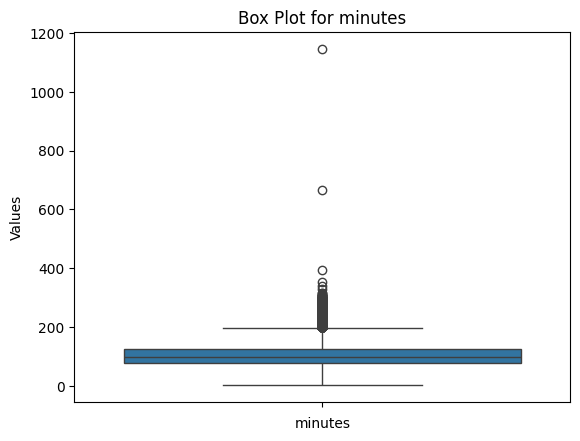

Box Plot for "num_sets": 



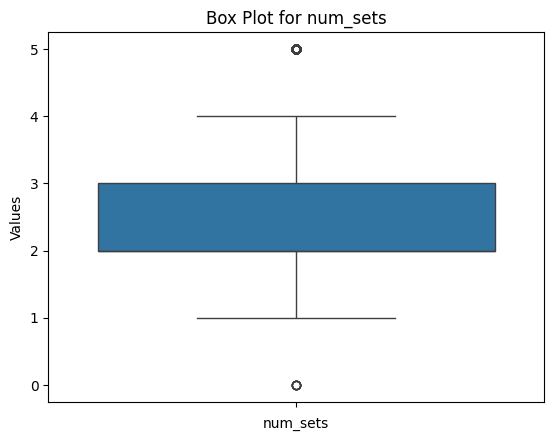

Box Plot for "winner_age": 



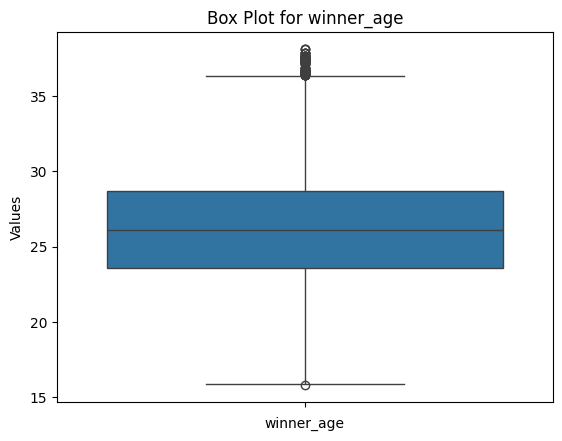

Box Plot for "loser_age": 



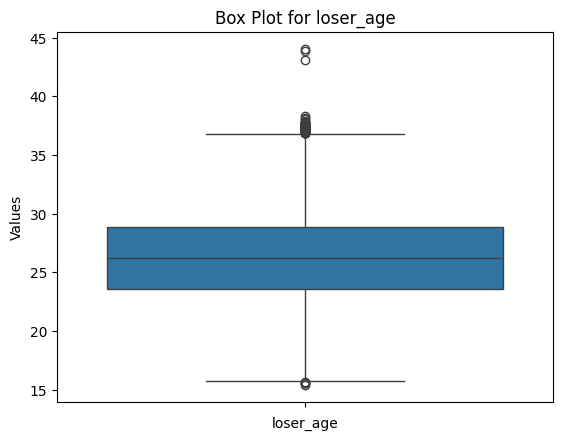

Box Plot for "player1_ace": 



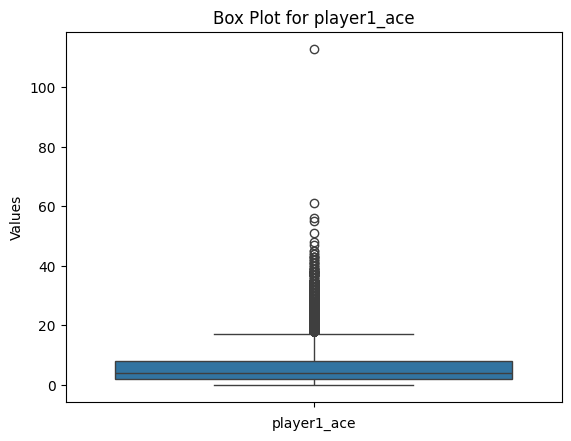

Box Plot for "player2_ace": 



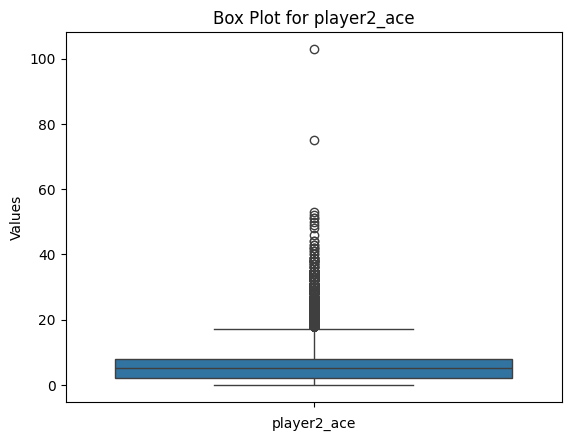

Box Plot for "player1_bpfaced": 



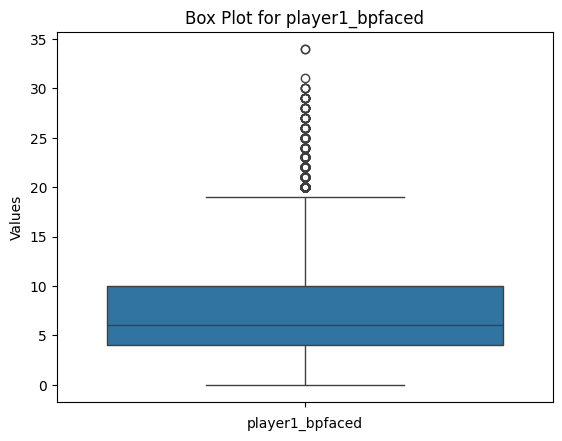

Box Plot for "player2_bpfaced": 



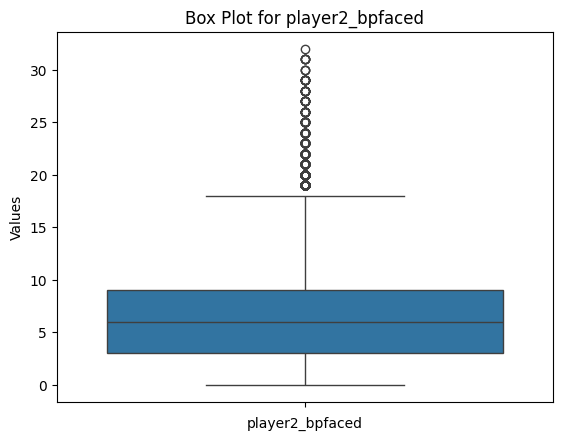

Box Plot for "player1_bpsaved": 



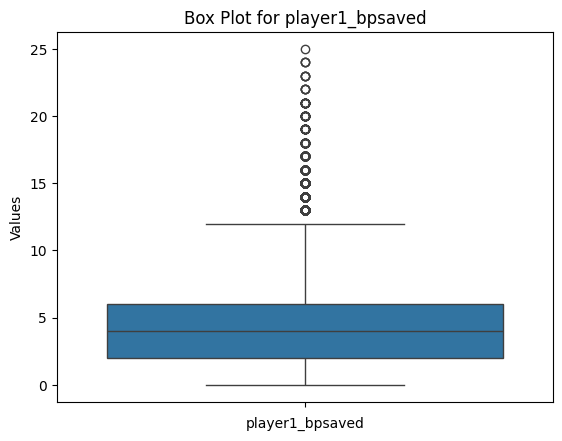

Box Plot for "player2_bpsaved": 



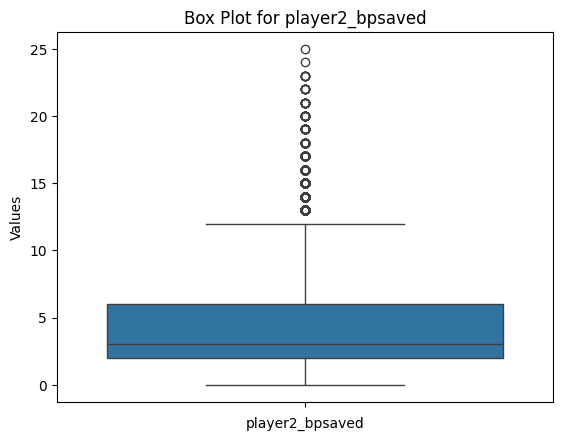

Box Plot for "player1_df": 



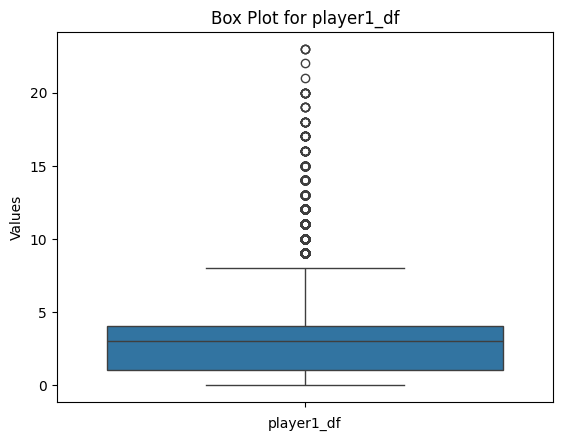

Box Plot for "player2_df": 



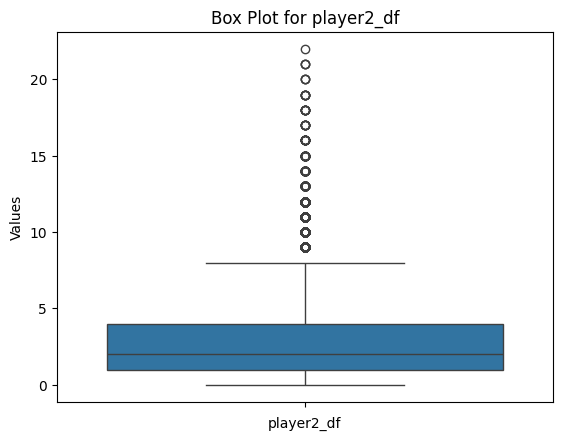

Box Plot for "player1_firstin": 



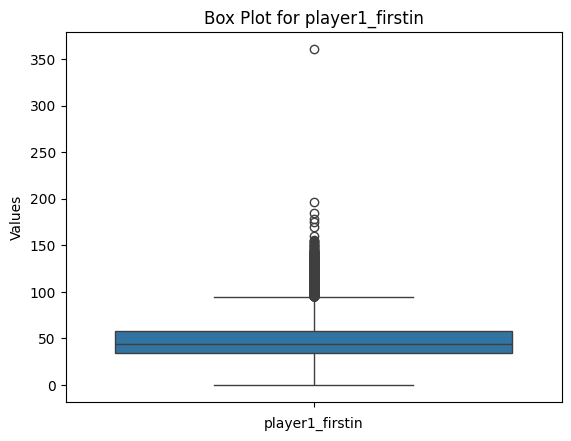

Box Plot for "player2_firstin": 



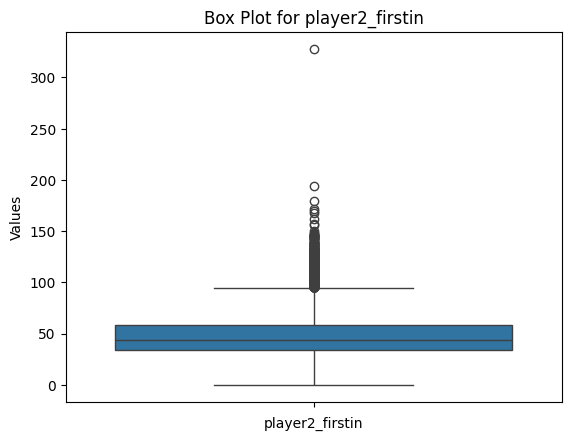

Box Plot for "player1_firstwon": 



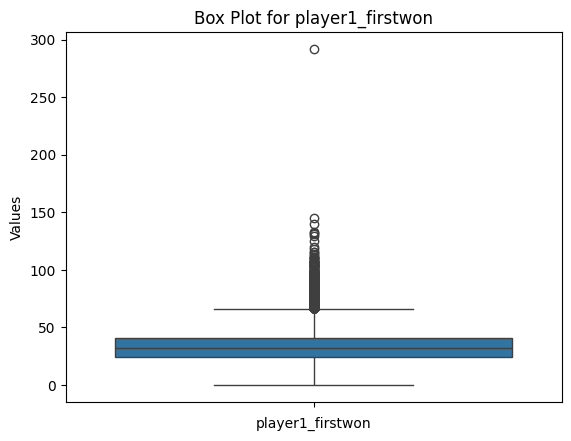

Box Plot for "player2_firstwon": 



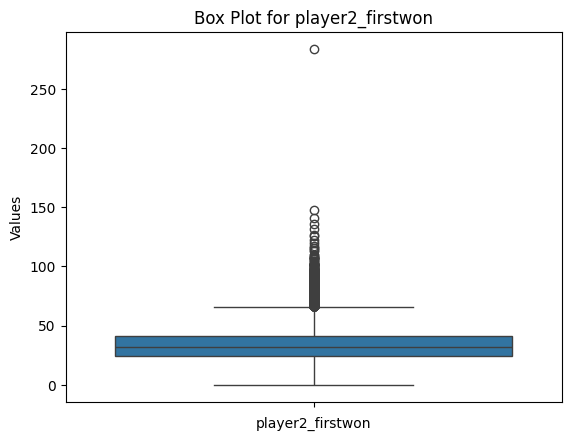

Box Plot for "player1_secondwon": 



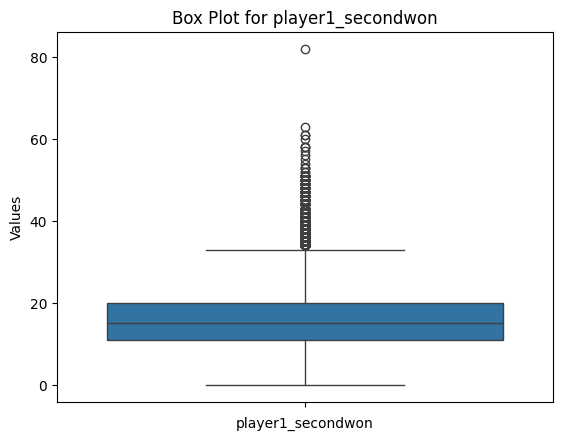

Box Plot for "player2_secondwon": 



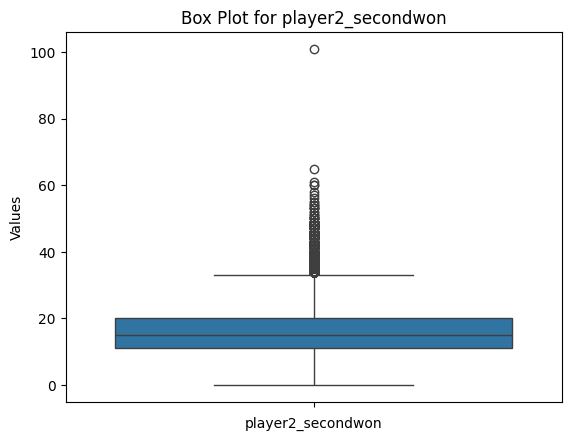

Box Plot for "player1_svgms": 



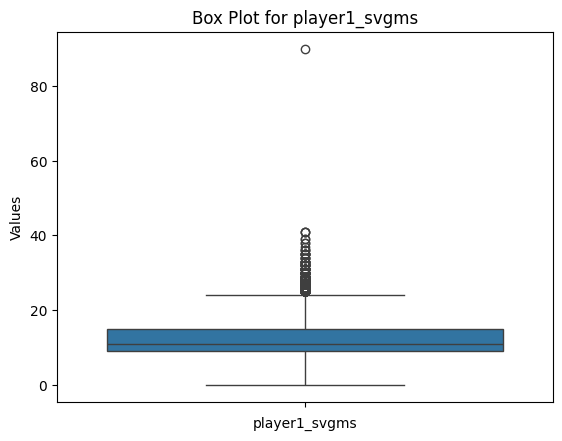

Box Plot for "player2_svgms": 



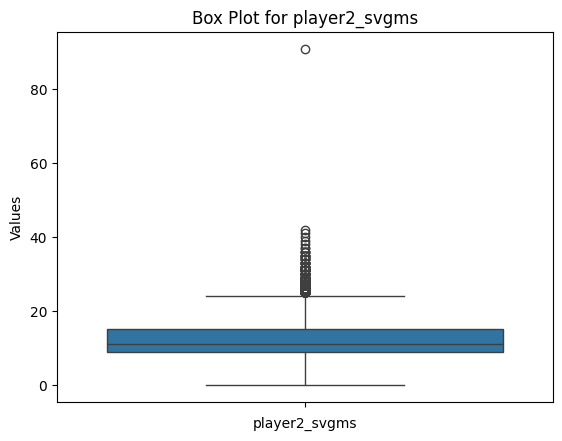

Box Plot for "player1_svpt": 



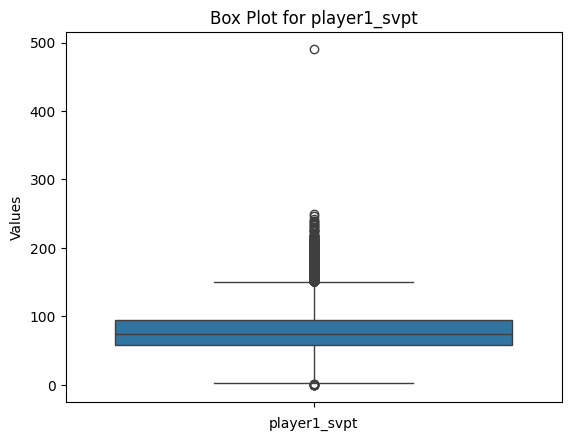

Box Plot for "player2_svpt": 



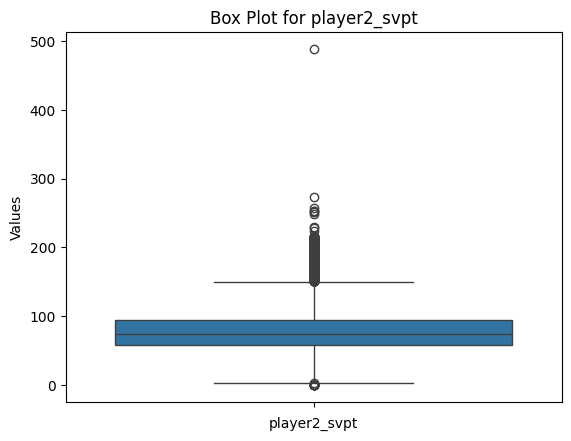

Box Plot for "winner_player_id": 



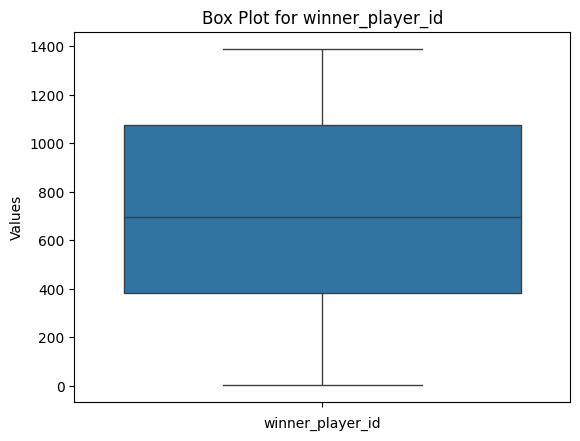

Box Plot for "loser_player_id": 



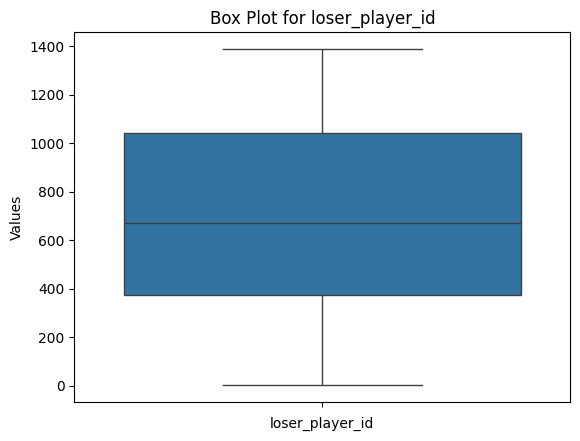

In [ ]:
#create boxplots for all columns used in univariate analysis
for col in rel_col_array:
  print(f'Box Plot for "{col}": \n')
  sns.boxplot(data = np.array(df_final[col]))
  plt.title(f"Box Plot for {col}")
  plt.xlabel(col)
  plt.ylabel("Values")
  plt.show()

Since the final dataset was engineered to have numeric columns for (ease in model building), categorical values such as 'surface' were mapped to number values. The following shows the legend to that mapping:

* 3 - hard
* 1 - clay
* 2 - grass
* 0 - carpet

In [ ]:
#creating dictionary to analyse surface
surface_mapping = {
  0:"carpet",
  1:"clay",
  2:"grass",
  3:"hard"
}
df_final['surface_mapped'] = df_final['surface'].map(surface_mapping)
df_final

,match_id,tourney_id,tourney_name,tourney_level,surface,match_num,best_of,round,minutes,num_sets,...,player1_secondwon,player2_secondwon,player1_svgms,player2_svgms,player1_svpt,player2_svpt,winner_player_id,loser_player_id,result,surface_mapped
0,0,0,77,0,1,1,3.0,5,162.0,3,...,31,29,17,16,110,126,124,106,1,clay
1,1,0,77,0,1,2,3.0,5,86.0,2,...,17,16,10,10,57,67,378,202,1,clay
2,2,0,77,0,1,3,3.0,5,64.0,2,...,11,10,8,8,46,65,1030,1193,0,clay
3,3,0,77,0,1,4,3.0,5,150.0,3,...,21,24,15,15,109,104,574,689,0,clay
4,4,0,77,0,1,5,3.0,5,60.0,2,...,10,16,8,9,47,50,585,53,1,clay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46944,47735,2562,29,2,3,2,3.0,7,136.0,4,...,20,16,13,14,96,104,1004,265,1,hard
46945,47736,2563,29,2,3,1,5.0,7,118.0,3,...,22,9,13,13,83,82,548,814,0,hard
46946,47737,2563,29,2,3,2,5.0,7,164.0,4,...,17,25,19,19,113,139,629,491,1,hard
46947,47738,2563,29,2,3,4,3.0,7,73.0,2,...,14,14,10,11,76,58,1166,17,1,hard


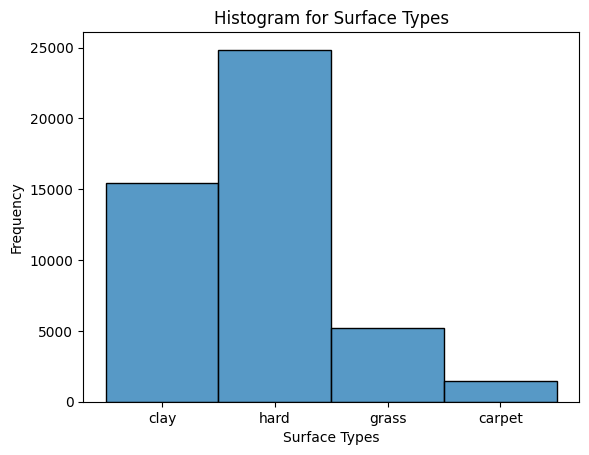

In [ ]:
# histogram for surface
sns.histplot(df_final['surface_mapped'])
plt.title(f"Histogram for Surface Types")
plt.xlabel('Surface Types')
plt.ylabel("Frequency")
plt.show()

The histogram above was plotted to explore the categorical variable ‘surface’. As shown in the histogram above, the distribution of data for each surface type is not even. There are $\approx 25000$ observations for hard court, $\approx 15000$ for clay, $\approx 5000$ for grass, and $\approx 1500$ for carpet. This suggests that the model’s predictions regarding the effect of surface type on win or loss may not be as accurate for carpet and grass as they would be for hard court and clay.

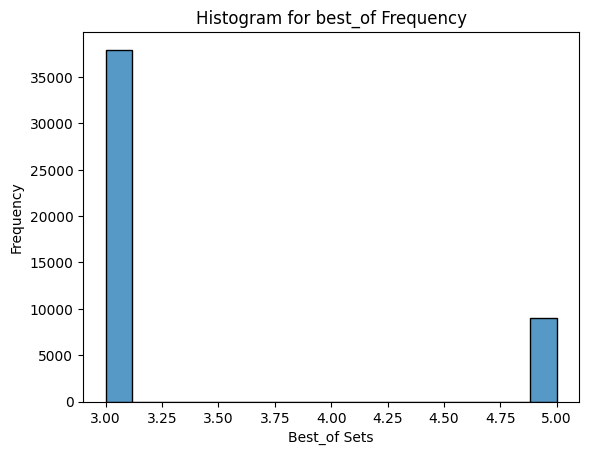

In [ ]:
#histogram for best of sets frequency
sns.histplot(df_final['best_of'])
plt.title(f"Histogram for best_of Frequency")
plt.xlabel('Best_of Sets')
plt.ylabel("Frequency")
plt.show()

The histogram above was plotted to explore the variable of ‘best_of”. As shown in the histogram, there are much fewer tournaments that played best of five. As mentioned earlier in the report, this was the expected outcome as only grand slams are played to best of five and there are only four grand slams per year. A possible implication this can have is that the model’s accuracy for best of five games may not be as good as its accuracy for best of three games.

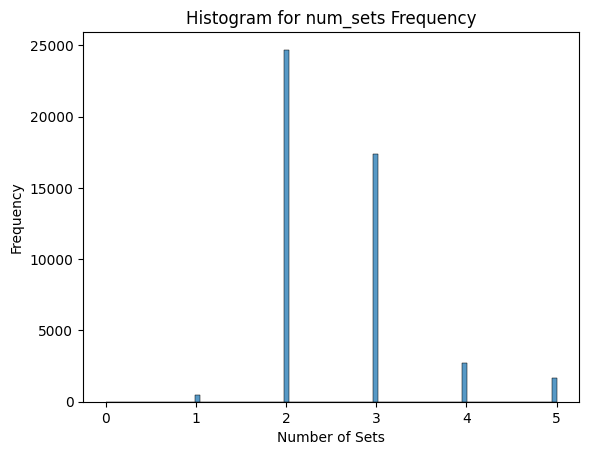

In [ ]:
#histogram for number of sets frequency
sns.histplot(df_final['num_sets'])
plt.title(f"Histogram for num_sets Frequency")
plt.xlabel('Number of Sets')
plt.ylabel("Frequency")
plt.show()

The histogram above was plotted to explore the categorical variable ‘num_sets’ i.e. the number of sets a game lasted. As expected based on the division of best of three and best of five games, majority of the games were won in two sets. An interesting trend is the distribution of observations between 3, 4 and 5 sets. Since these three options are only possible for best of five games, it seems that most of these games were won in 3 sets ($\approx 17000$).

#### **Mulitvariate Analysis**

In [ ]:
df_final = df_final.drop('surface_mapped', axis=1) #dropping mapped surface to continue with analysis
df_final.columns

Index(['match_id', 'tourney_id', 'tourney_name', 'tourney_level', 'surface',
       'match_num', 'best_of', 'round', 'minutes', 'num_sets', 'ret',
       'winner_age', 'loser_age', 'winner_rank', 'loser_rank',
       'winner_rank_points', 'loser_rank_points', 'winner_seed', 'loser_seed',
       'winner_ioc', 'loser_ioc', 'winner_hand', 'loser_hand', 'player1_ace',
       'player2_ace', 'player1_bpfaced', 'player2_bpfaced', 'player1_bpsaved',
       'player2_bpsaved', 'player1_df', 'player2_df', 'player1_firstin',
       'player2_firstin', 'player1_firstwon', 'player2_firstwon',
       'player1_secondwon', 'player2_secondwon', 'player1_svgms',
       'player2_svgms', 'player1_svpt', 'player2_svpt', 'winner_player_id',
       'loser_player_id', 'result'],
      dtype='object')

In [ ]:
# creating dataframes for a player's won and lost games
def winloss(player_name, df_final = df_final):
  '''
  The following function creates dataframes for a given player's won and lost games.
  It will be used to explore the impact of select independent variables on wins and losses.

  Input:
  player_name: Name of player for which the dataframes need to be constrcuted
  df_final: defaults to df_fianl

  Output:
  player_df_win: dataframe for player's won games
  player_df_loss: dataframe for player's lost games
  '''
  player_id = player_id_map_two.get(player_name)
  player_df_win = pd.DataFrame()
  player_df_loss = pd.DataFrame()
  for player in np.array(df_final['winner_player_id']):
    if player == player_id:
      player_df_win = df_final[df_final['winner_player_id'] == player]
      break
  for player in np.array(df_final['loser_player_id']):
    if player == player_id:
      player_df_loss = df_final[df_final['loser_player_id'] == player]
      break
  return player_df_win, player_df_loss

<ipython-input-40-ef1b31faaf13>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rf_win['winner_age'] = rf_win['winner_age'].astype(int)
<ipython-input-40-ef1b31faaf13>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rf_loss['loser_age'] = rf_loss['loser_age'].astype(int)
<ipython-input-40-ef1b31faaf13>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

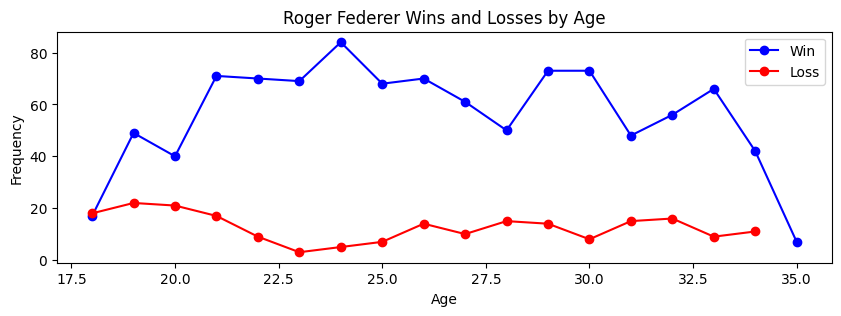

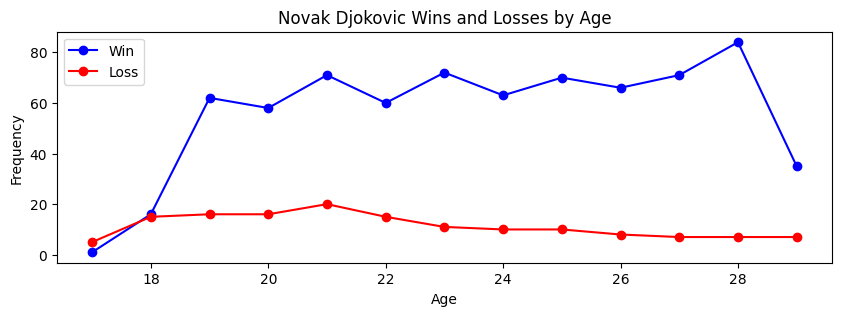

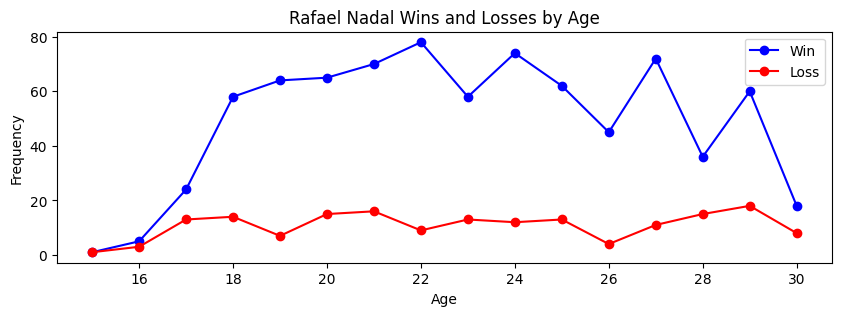

In [ ]:
# Observing if age impact wins and losses
# For Roger Federer
rf_win, rf_loss = winloss('Roger Federer')

rf_win['winner_age'] = rf_win['winner_age'].astype(int)
rf_win_grouped = rf_win.groupby('winner_age').count().reset_index()
#plotting wins and losses with age
plt.figure(figsize=(10, 3))
plt.plot(rf_win_grouped['winner_age'], rf_win_grouped['match_id'], '-o', color='blue', label = 'Win')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Roger Federer Wins and Losses by Age')
rf_loss['loser_age'] = rf_loss['loser_age'].astype(int)
rf_loss_grouped = rf_loss.groupby('loser_age').count().reset_index()
plt.plot(rf_loss_grouped['loser_age'], rf_loss_grouped['match_id'], '-o', color='red', label = 'Loss')
plt.legend()

# For Novak Djokovic
nd_win, nd_loss = winloss('Novak Djokovic')

nd_win['winner_age'] = nd_win['winner_age'].astype(int)
nd_win_grouped = nd_win.groupby('winner_age').count().reset_index()
#plotting wins and losses with age
plt.figure(figsize=(10, 3))
plt.plot(nd_win_grouped['winner_age'], nd_win_grouped['match_id'], '-o', color='blue', label = 'Win')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Novak Djokovic Wins and Losses by Age')
nd_loss['loser_age'] = nd_loss['loser_age'].astype(int)
nd_loss_grouped = nd_loss.groupby('loser_age').count().reset_index()
plt.plot(nd_loss_grouped['loser_age'], nd_loss_grouped['match_id'], '-o', color='red', label = 'Loss')
plt.legend()

# For Rafael Nadal
rn_win, rn_loss = winloss('Rafael Nadal')

rn_win['winner_age'] = rn_win['winner_age'].astype(int)
rn_win_grouped = rn_win.groupby('winner_age').count().reset_index()
#plotting wins and losses with age
plt.figure(figsize=(10, 3))
plt.plot(rn_win_grouped['winner_age'], rn_win_grouped['match_id'], '-o', color='blue', label = 'Win')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Rafael Nadal Wins and Losses by Age')
rn_loss['loser_age'] = rn_loss['loser_age'].astype(int)
rn_loss_grouped = rn_loss.groupby('loser_age').count().reset_index()
plt.plot(rn_loss_grouped['loser_age'], rn_loss_grouped['match_id'], '-o', color='red', label = 'Loss')
plt.legend()

As seen in the above graphs, all three players seem to have a relatively stable win frequency till the age of 26. After 26, the spikes and dips in frequency of wins increases. This could suggest that the older you get, the harder it is to consistently win due to reasons such as lack of stamina etc. However, a conclusive causal relationship cannot be established from this graph since possible confounders such as injury, family problems etc. could have also contributed to the spikes and dips. A deeper analysis for each player during that time frame would need to be done to make a conclusive statement.

<Axes: >

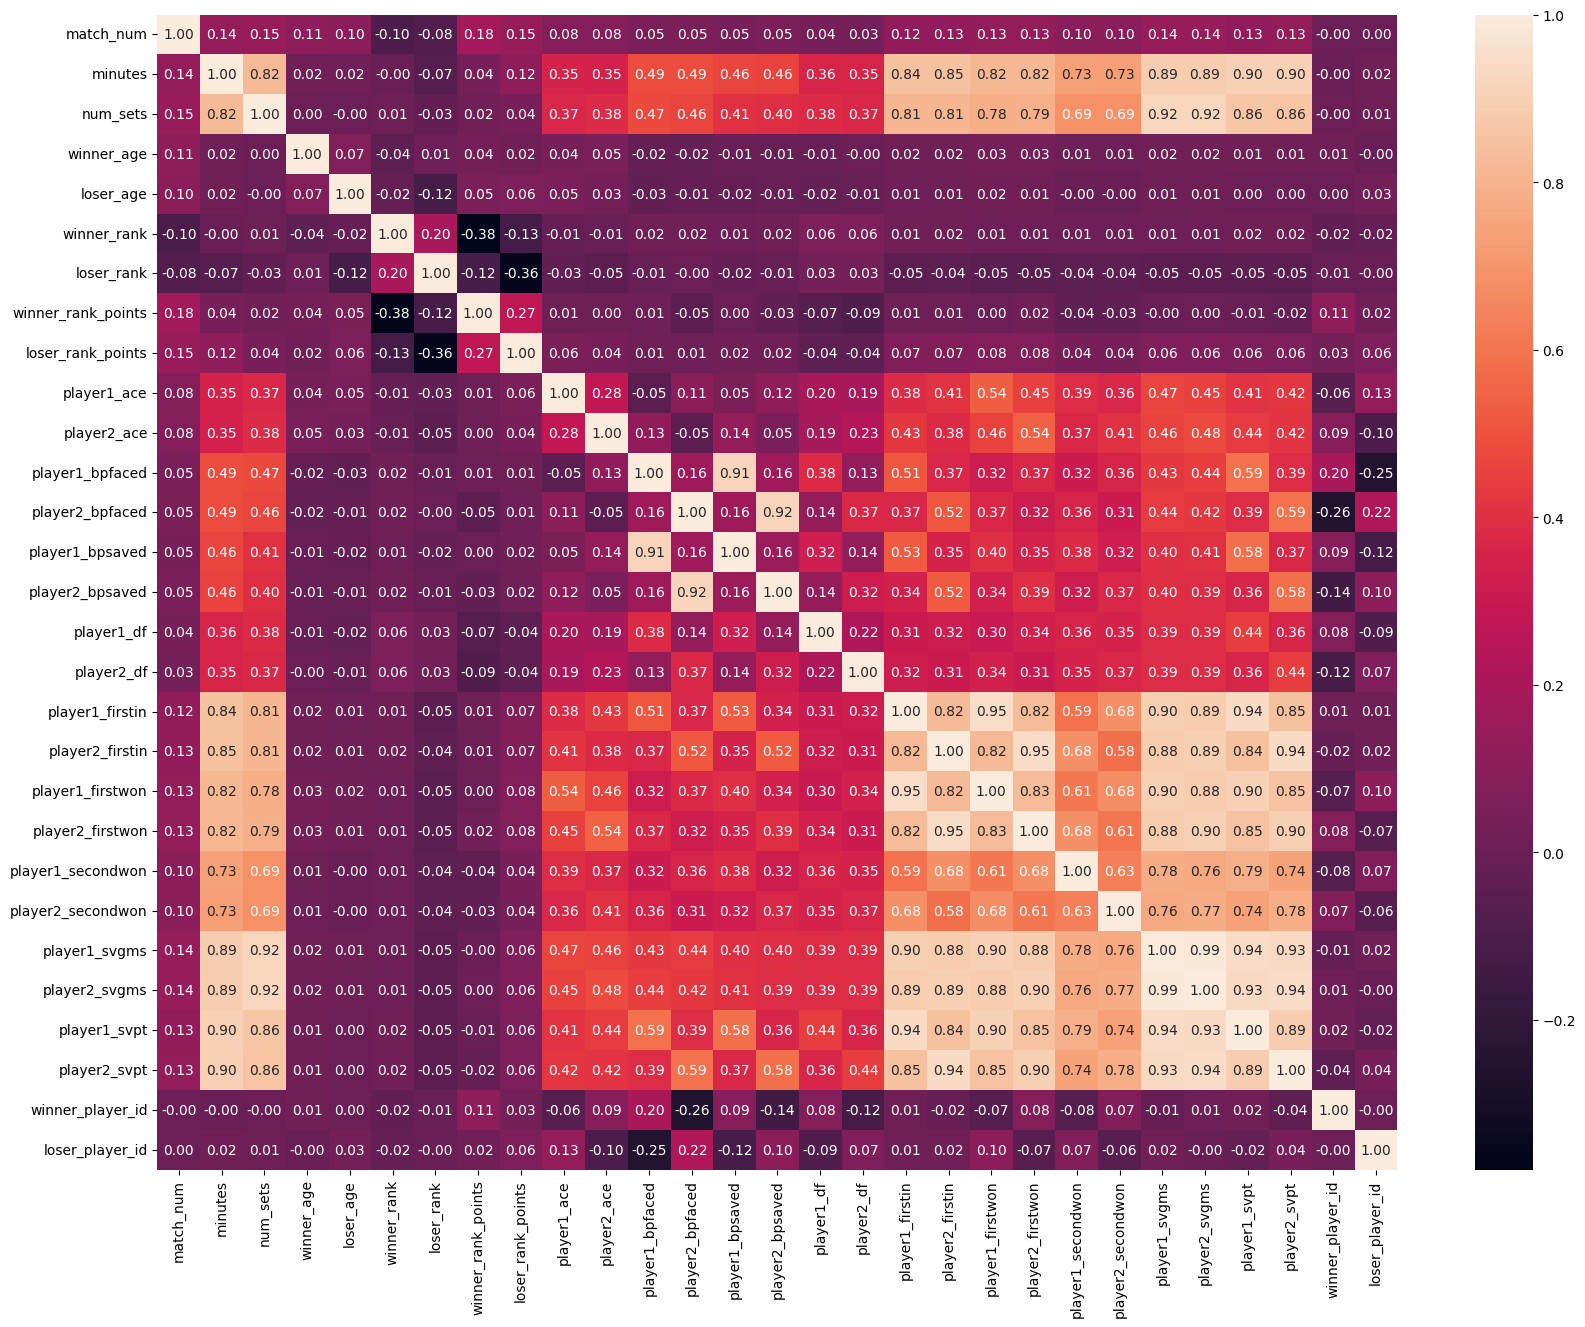

In [ ]:
drop_indices = [0,1,2,3,4,6,7,10,17,18,19,20,21,22,43] #dropping categorical columns
drop_col = df_final.columns[drop_indices]
df_corr = df_final.drop(columns = drop_col)
#create heatmap showing correlation between variables
plt.figure(figsize=(20,15))
sns.heatmap(df_corr.corr(), annot = True, fmt=".2f", cbar=True)

Throught the above heatmap we can see that most of the data has no direct correlation within it. The exception to this is the area covered by the player1 and player2 data. This is to be expected as all of these values control the flow of the game and the distributions are similar as seen by the box plots. Another way to see this data is through a pairplot. Given the amount of variables, it made more sense to stick with a heatmap for this task.

#### **Hypothesis Testing**

An independent T-test will be performed for the hypothesis test case shown below. Before proceding with the test, it is important to see if the assumptions for the test are satisifed. The assumptions for an independent t-test include:
* **Independence:** The observations in each group must be independent of each other
* **Normality:** The data in each group should be approximately normally distributed - ***this will be checked using a histogram plot***
* **Homogeneity of Variances:** The variances of the two groups should be approximately equal - ***this will be checked using Levene's test***

**Testing statistical significance of 'minutes' on winning**

To test the significance of minutes played, a t-test test will be peformed to check if the average minutes played differ for wins and losses. The following are the hypotheses for the test:

$H_0: μ_0 \neq μ_1$

$H_α: μ_0 = μ_1$


The test will be performed for five players to see if conclusion on statistical significance can be extraplotated to the entire dataset.

Observing calculated differences in means before performing the hypothesis test as part of EDA:

In [ ]:
#print mean minute values for win and loss of different players for initial obersvation before hypothesis test

#Roger Federer
rf_win, rf_loss = winloss('Roger Federer') #obtaining the win and loss dataframes for Federer
rf_win_min_mean = np.mean(rf_win['minutes'])
rf_loss_min_mean = np.mean(rf_loss['minutes'])

print(f"Mean minutes for Federer wins: {rf_win_min_mean}")
print(f"Mean minutes for Federer losses: {rf_loss_min_mean}\n")

#Novak Djokovic
nd_win, nd_loss = winloss('Novak Djokovic') #obtaining the win and loss dataframes for Djokovic
nd_win_min_mean = np.mean(nd_win['minutes'])
nd_loss_min_mean = np.mean(nd_loss['minutes'])

print(f"Mean minutes for Djokovic wins: {nd_win_min_mean}")
print(f"Mean minutes for Djokovic losses: {nd_loss_min_mean}\n")

#Daniil Medvedev
dm_win, dm_loss = winloss('Daniil Medvedev') #obtaining the win and loss dataframes for Medvedev
dm_win_min_mean = np.mean(dm_win['minutes'])
dm_loss_min_mean = np.mean(dm_loss['minutes'])

print(f"Mean minutes for Medvedev wins: {dm_win_min_mean}")
print(f"Mean minutes for Medvedev losses: {dm_loss_min_mean}\n")

#Kei Nishikori
kn_win, kn_loss = winloss('Kei Nishikori') #obtaining the win and loss dataframes for Nishikori
kn_win_min_mean = np.mean(kn_win['minutes'])
kn_loss_min_mean = np.mean(kn_loss['minutes'])

print(f"Mean minutes for Nishikori wins: {kn_win_min_mean}")
print(f"Mean minutes for Nishikori losses: {kn_loss_min_mean}\n")

#Nick Kyrgios
nk_win, nk_loss = winloss('Nick Kyrgios') #obtaining the win and loss dataframes for Kyrgios
nk_win_min_mean = np.mean(nk_win['minutes'])
nk_loss_min_mean = np.mean(nk_loss['minutes'])

print(f"Mean minutes for Kyrgios wins: {nk_win_min_mean}")
print(f"Mean minutes for Kyrgios losses: {nk_loss_min_mean}\n")

Mean minutes for Federer wins: 97.14562289219025
Mean minutes for Federer losses: 125.31371321019341

Mean minutes for Djokovic wins: 111.06516315671799
Mean minutes for Djokovic losses: 129.4781005182914

Mean minutes for Medvedev wins: 89.44444444444444
Mean minutes for Medvedev losses: 119.5

Mean minutes for Nishikori wins: 110.04358988705503
Mean minutes for Nishikori losses: 102.53036593403151

Mean minutes for Kyrgios wins: 105.49589431566301
Mean minutes for Kyrgios losses: 111.01958903643036



In [ ]:
#creating a function to plot histograms and check for normality assumption
def histplot(array1, array2, name):
  '''
  This functions plots two hisograms for any given player's won and lost games.
  Input:
  array1: won games
  array2: lost games
  name: name of player
  Output:
  Histogram for won games
  Histogram for lost games
  '''
  fig, axes = plt.subplots(1, 2, figsize=(12, 6))
  sns.histplot(array1, kde=True, ax=axes[0])
  sns.histplot(array2, kde=True, ax=axes[1])
  axes[0].set_title(f'Minutes distribution for games won for {name}')
  axes[1].set_title(f'Minutes distribution for games lost for {name}')
  plt.show()

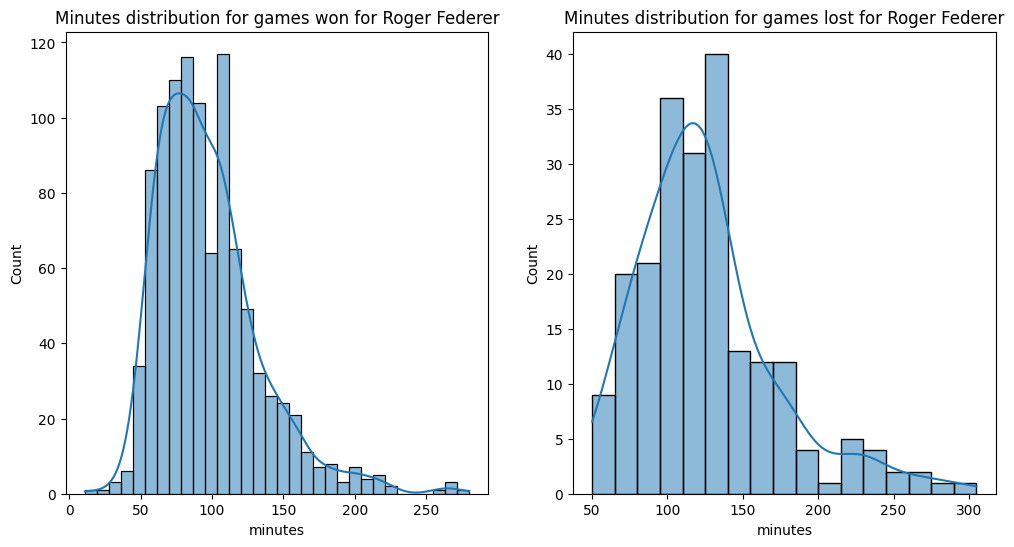

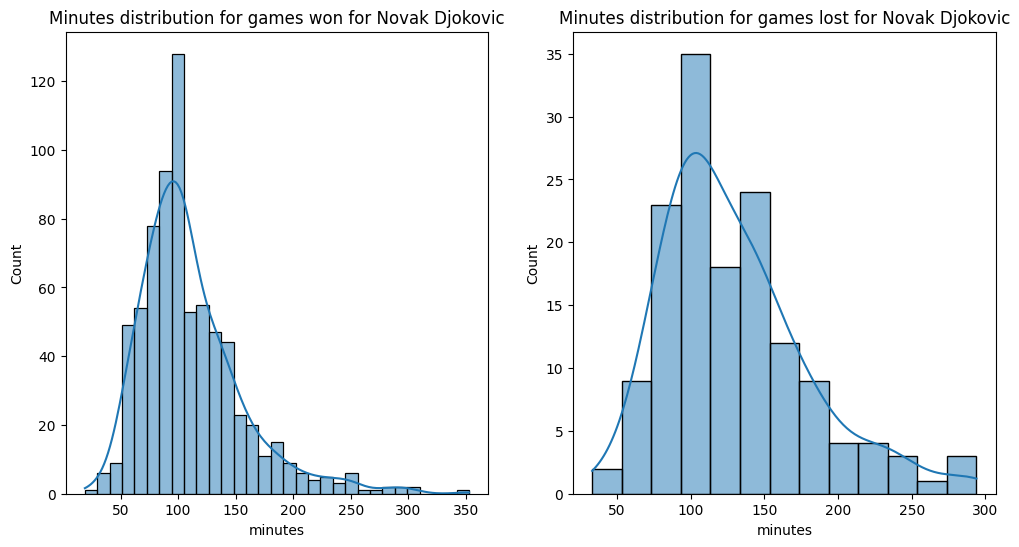

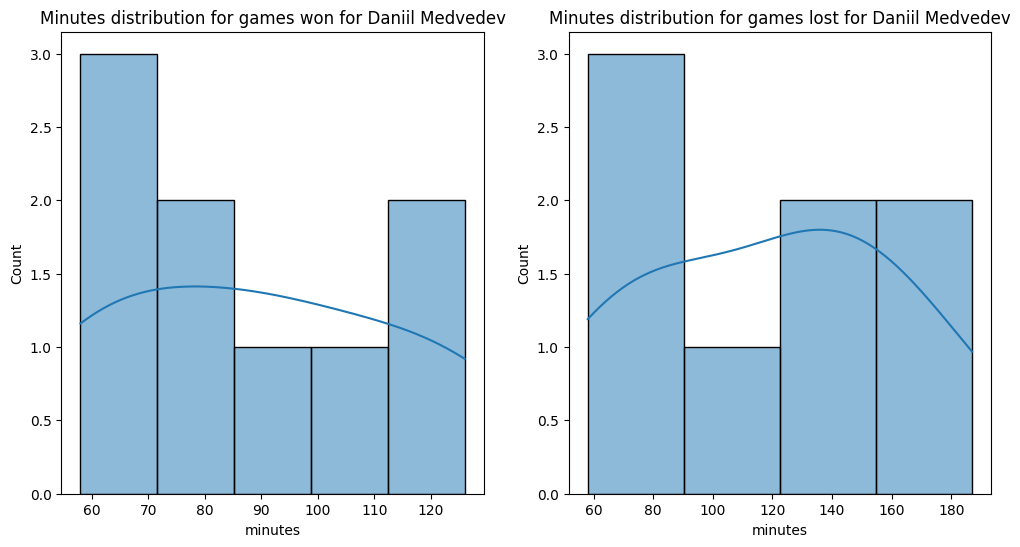

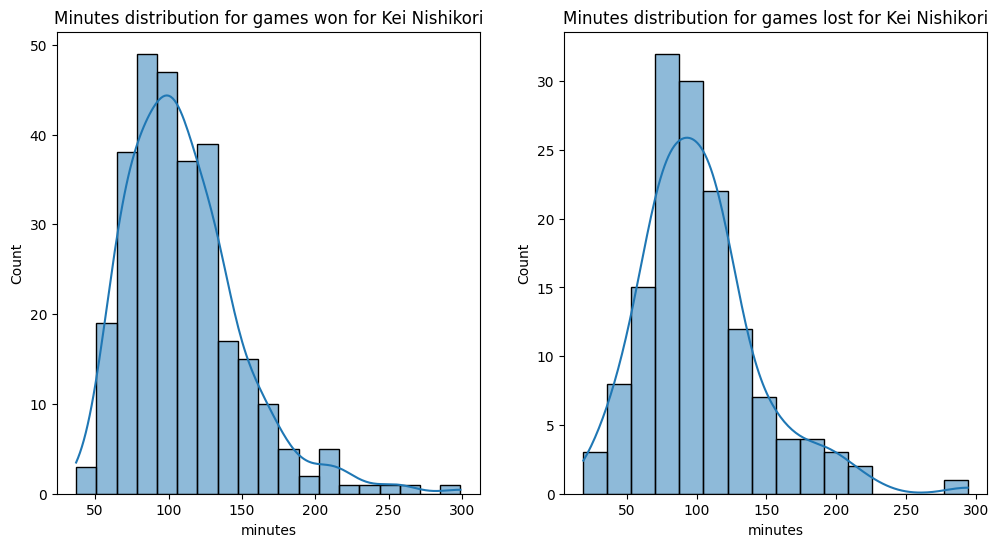

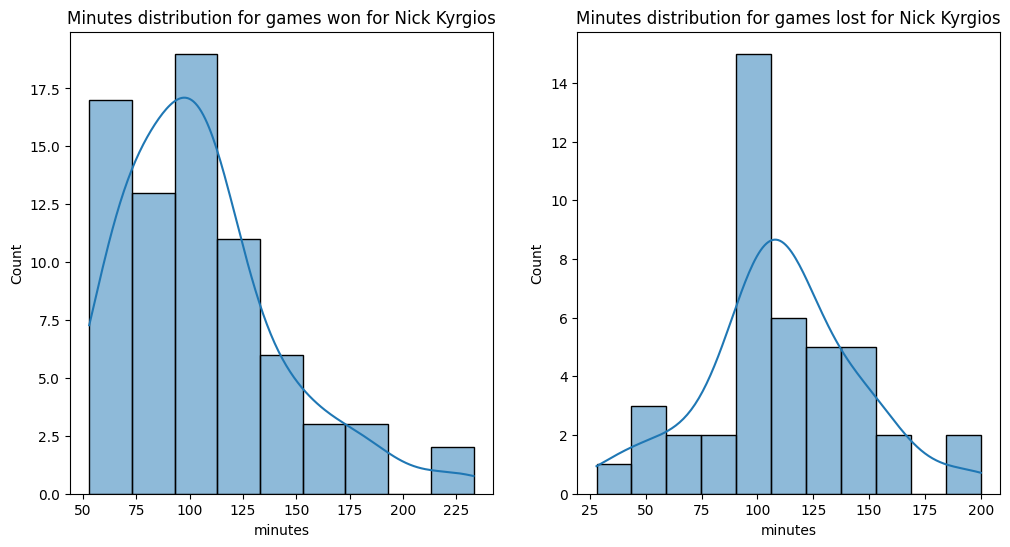

In [ ]:
#using function to plot the histograms
histplot(rf_win['minutes'], rf_loss['minutes'], 'Roger Federer')
histplot(nd_win['minutes'], nd_loss['minutes'], 'Novak Djokovic')
histplot(dm_win['minutes'], dm_loss['minutes'], 'Daniil Medvedev')
histplot(kn_win['minutes'], kn_loss['minutes'], 'Kei Nishikori')
histplot(nk_win['minutes'], nk_loss['minutes'], 'Nick Kyrgios')

As seen through the above histograms, most of the data is skewed to the right. Hence, the normality assumption is not satisfied. The below code tries to satisfy the normality assumption by taking the log of the data.

In [ ]:
#creating function to take log of values
def norm(df1, df2, name):
  df1 = np.array(df1['minutes'])
  df2 = np.array(df2['minutes'])
  df1 = np.log(df1)
  df2 = np.log(df2)
  return df1, df2

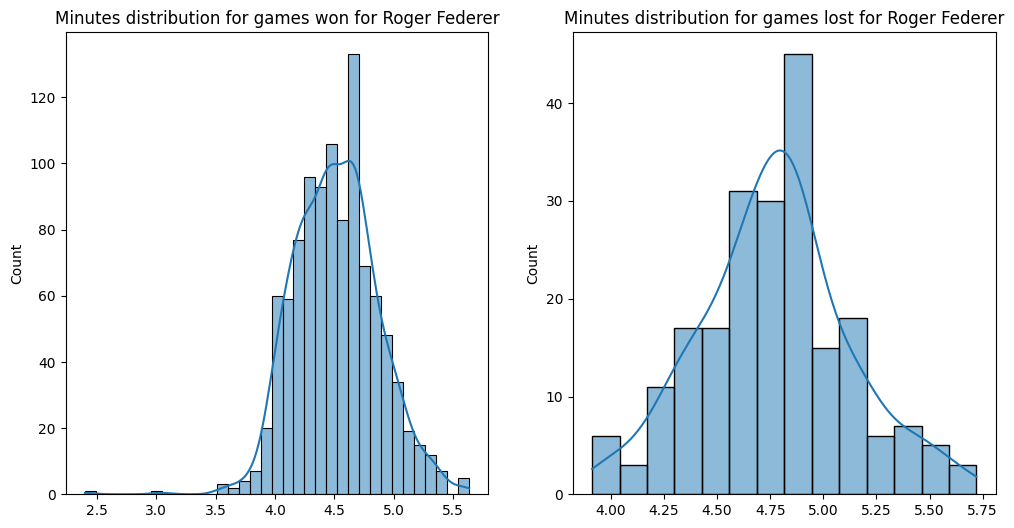

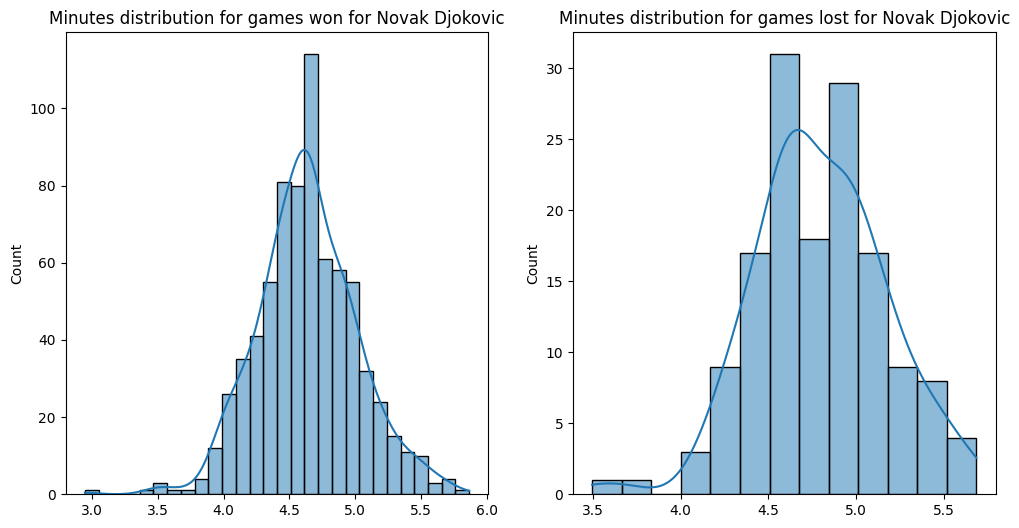

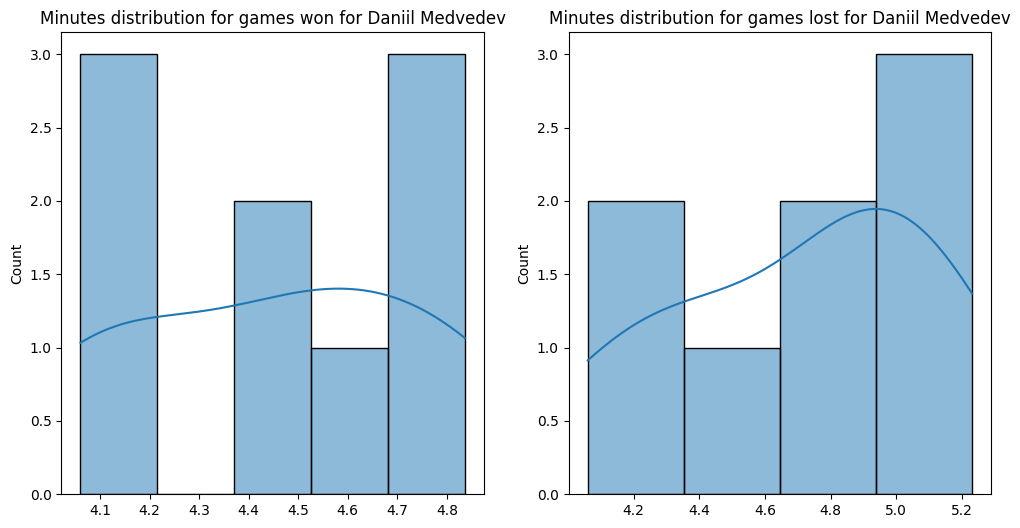

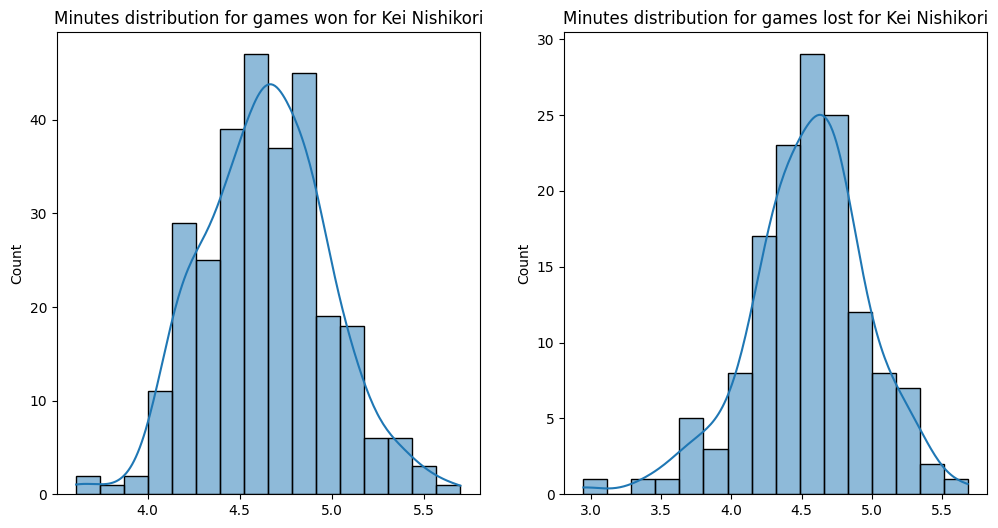

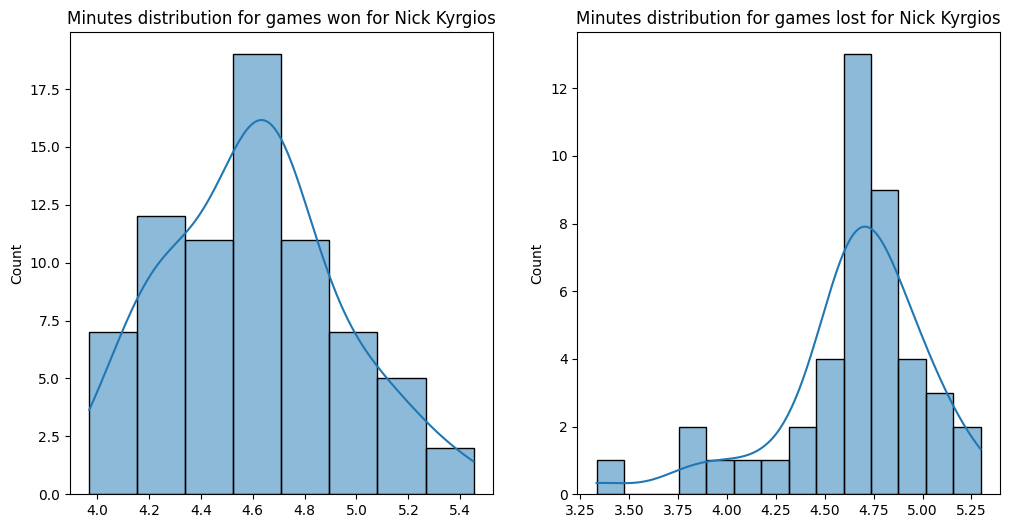

In [ ]:
rf_win_norm, rf_loss_norm = norm(rf_win, rf_loss, 'Roger Federer')
nd_win_norm, nd_loss_norm = norm(nd_win, nd_loss, 'Novak Djokovic')
dm_win_norm, dm_loss_norm = norm(dm_win, dm_loss, 'Daniil Medvedev')
kn_win_norm, kn_loss_norm = norm(kn_win, kn_loss, 'Kei Nishikori')
nk_win_norm, nk_loss_norm = norm(nk_win, nk_loss, 'Nick Kyrgios')

#plotting histograms with transformed data to check for normality
histplot(rf_win_norm, rf_loss_norm, 'Roger Federer')
histplot(nd_win_norm, nd_loss_norm, 'Novak Djokovic')
histplot(dm_win_norm, dm_loss_norm, 'Daniil Medvedev')
histplot(kn_win_norm, kn_loss_norm, 'Kei Nishikori')
histplot(nk_win_norm, nk_loss_norm, 'Nick Kyrgios')

As seen through the above histograms, the skewness has been fixed to a large extent. There is still some data, such as the minutes distribution for Daniel Medvedev, that violate the assumption to an extent. To fix this problem, a possible extension in the future could be a Box Cox transformation. For now, as majority of the data approximately satisfies the normality assumption, the hypothesis test has been conducted using this data.

The below code tests for homogeneity of variance using the Levene test at $\alpha=0.05$:


In [ ]:
#Levene test for constant variance
print(f"Levene's test for Roger Federer: \n {levene(rf_win_norm, rf_loss_norm)}")
print(f"Levene's test for Novak Djokovic: \n {levene(nd_win_norm, nd_loss_norm)}")
print(f"Levene's test for Daniil Medvedev: \n {levene(dm_win_norm, dm_loss_norm)}")
print(f"Levene's test for Kei Nishikori: \n {levene(kn_win_norm, kn_loss_norm)}")
print(f"Levene's test for Nick Kyrgios: \n {levene(nk_win_norm, nk_loss_norm)}")

Levene's test for Roger Federer: 
 LeveneResult(statistic=0.45661544689699, pvalue=0.49933744694463933)
Levene's test for Novak Djokovic: 
 LeveneResult(statistic=0.06830156740531572, pvalue=0.7938875099935104)
Levene's test for Daniil Medvedev: 
 LeveneResult(statistic=0.740021323036507, pvalue=0.4031945416150702)
Levene's test for Kei Nishikori: 
 LeveneResult(statistic=4.468571769955043, pvalue=0.035096365303815324)
Levene's test for Nick Kyrgios: 
 LeveneResult(statistic=0.07271327922475877, pvalue=0.7879097117842829)


As seen through the output above, all p-values are $> 0.05$, which means that we fail to reject the null for all the players and conclude the homogeneity of variance assumption is satisfied.

In [ ]:
#creating a function to perform the hypotheis test
def ttest(df1_norm, df2_norm, name):
  '''
  The following function performs the t-test
  Input:
  df1_norm: normalised won games
  df2_norm: normalised lost games
  name: name of player
  Output:
  t-statistic and p-value
  '''
  t_stat, p_val = ttest_ind(df1_norm, df2_norm)
  result = (
      f"Hypothesis Test for {name}: \n"
      f"t-statistic: {t_stat}: \n"
      f"p-value: {p_val}: \n")
  return result

In [ ]:
print(ttest(rf_win_norm, rf_loss_norm, 'Roger Federer'))
print(ttest(nd_win_norm, nd_loss_norm, 'Novak Djokovic'))
print(ttest(dm_win_norm, dm_loss_norm, 'Daniil Medvedev'))
print(ttest(kn_win_norm, kn_loss_norm, 'Kei Nishikori'))
print(ttest(nk_win_norm, nk_loss_norm, 'Nick Kyrgios'))

Hypothesis Test for Roger Federer: 
t-statistic: -9.633809524733355: 
p-value: 3.178625695543833e-21: 

Hypothesis Test for Novak Djokovic: 
t-statistic: -4.615647602296979: 
p-value: 4.505738029229838e-06: 

Hypothesis Test for Daniil Medvedev: 
t-statistic: -1.5087154179192566: 
p-value: 0.1521444842852027: 

Hypothesis Test for Kei Nishikori: 
t-statistic: 2.5524901994394527: 
p-value: 0.011038589101373718: 

Hypothesis Test for Nick Kyrgios: 
t-statistic: -0.7086661066211397: 
p-value: 0.47996578683235436: 



Through the output above:
- The p-values for Roger Federer, Novak Djokovic, and Kei Nishikori are less than $\alpha=0.05$, so we reject the null and conclude that the average minutes for games won and lost are not equal

- The p-values for Daniil Medvedev, Nick Kyrgios are greater than $\alpha=0.05$, so we fail to reject the null and conclude that the average minute for games won and lost are equal

Since the hypothesis test resulted in different conclusions for the above players, it can be assumed that the *minutes played is not statistically significant in determining whether a player won or lost.*

To make this statement more conclusive or accurate, the hypothesis test can be carried out for all the players and see if Kyrgios and Medvedev are the exceptions.

